<h3>Problem Description
    
<h5>In this use case, we will understand and find the relation between CCS and the independent features using statistical models and use the same for prediction.

<br>The independent features are :
cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate,fine aggregate and age 

<h4>Data Understanding
    <h5>
        -  No of independent variable : 8  <br> 
        -  Target variable: Concrete_compressive_strength <br> 
        -  No of rows: 1030 <br>
        -  No missing values in the data set <br>
        -  All coloums are numeric. No data type conversion required<br>
        - All features are on a different scale
        -  Since we are predecting a numeric variable we will be using Multiple Linear regression to predict CCS value 
      
        
     

In [225]:
#importing all required library

library(dplyr)
library(caret)
library(corrplot)
library(DMwR)
library(car)
library(MASS)
library(rcompanion)
library(glmnet)

In [226]:
#import raw data set
raw_data=read.csv("Concrete_Data.csv")


In [234]:
#understanding data and checking null and summary 

head(raw_data)

Cement Blast_Furnace_Slag Fly_Ash Water Superplasticizer Coarse_Aggregate
1 540.0    0.0              0       162   2.5              1040.0          
2 540.0    0.0              0       162   2.5              1055.0          
3 332.5  142.5              0       228   0.0               932.0          
4 332.5  142.5              0       228   0.0               932.0          
5 198.6  132.4              0       192   0.0               978.4          
6 266.0  114.0              0       228   0.0               932.0          
  Fine_Aggregate Age_in_days Concrete_compressive_strength
1 676.0           28         79.99                        
2 676.0           28         61.89                        
3 594.0          270         40.27                        
4 594.0          365         41.05                        
5 825.5          360         44.30                        
6 670.0           90         47.03

In [235]:
tail(raw_data)

Cement Blast_Furnace_Slag Fly_Ash Water Superplasticizer Coarse_Aggregate
1025 166.0  259.7                0.0   183.2 12.7             858.8           
1026 276.4  116.0               90.3   179.6  8.9             870.1           
1027 322.2    0.0              115.6   196.0 10.4             817.9           
1028 148.5  139.4              108.6   192.7  6.1             892.4           
1029 159.1  186.7                0.0   175.6 11.3             989.6           
1030 260.9  100.5               78.3   200.6  8.6             864.5           
     Fine_Aggregate Age_in_days Concrete_compressive_strength
1025 826.8          28          37.92                        
1026 768.3          28          44.28                        
1027 813.4          28          31.18                        
1028 780.0          28          23.70                        
1029 788.9          28          32.77                        
1030 761.5          28          32.40

In [236]:
dim(raw_data)

[1] 1030    9

In [237]:
summary(raw_data)

     Cement      Blast_Furnace_Slag    Fly_Ash           Water      
 Min.   :102.0   Min.   :  0.0      Min.   :  0.00   Min.   :121.8  
 1st Qu.:192.4   1st Qu.:  0.0      1st Qu.:  0.00   1st Qu.:164.9  
 Median :272.9   Median : 22.0      Median :  0.00   Median :185.0  
 Mean   :281.2   Mean   : 73.9      Mean   : 54.19   Mean   :181.6  
 3rd Qu.:350.0   3rd Qu.:142.9      3rd Qu.:118.30   3rd Qu.:192.0  
 Max.   :540.0   Max.   :359.4      Max.   :200.10   Max.   :247.0  
 Superplasticizer Coarse_Aggregate Fine_Aggregate   Age_in_days    
 Min.   : 0.000   Min.   : 801.0   Min.   :594.0   Min.   :  1.00  
 1st Qu.: 0.000   1st Qu.: 932.0   1st Qu.:731.0   1st Qu.:  7.00  
 Median : 6.400   Median : 968.0   Median :779.5   Median : 28.00  
 Mean   : 6.205   Mean   : 972.9   Mean   :773.6   Mean   : 45.66  
 3rd Qu.:10.200   3rd Qu.:1029.4   3rd Qu.:824.0   3rd Qu.: 56.00  
 Max.   :32.200   Max.   :1145.0   Max.   :992.6   Max.   :365.00  
 Concrete_compressive_strength
 Min.   : 

In [238]:
str(raw_data)

'data.frame':	1030 obs. of  9 variables:
 $ Cement                       : num  540 540 332 332 199 ...
 $ Blast_Furnace_Slag           : num  0 0 142 142 132 ...
 $ Fly_Ash                      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Water                        : num  162 162 228 228 192 228 228 228 228 228 ...
 $ Superplasticizer             : num  2.5 2.5 0 0 0 0 0 0 0 0 ...
 $ Coarse_Aggregate             : num  1040 1055 932 932 978 ...
 $ Fine_Aggregate               : num  676 676 594 594 826 ...
 $ Age_in_days                  : num  28 28 270 365 360 90 365 28 28 28 ...
 $ Concrete_compressive_strength: num  80 61.9 40.3 41 44.3 ...


In [239]:
colSums(is.na(raw_data))

Cement            Blast_Furnace_Slag 
                            0                             0 
                      Fly_Ash                         Water 
                            0                             0 
             Superplasticizer              Coarse_Aggregate 
                            0                             0 
               Fine_Aggregate                   Age_in_days 
                            0                             0 
Concrete_compressive_strength 
                            0

<h4>EDA
    <h5>
     -  This problem is a Regression problem and we would be using RMSE to evakuate the performance of the model <br>
     -  CCS is highly correlated only with Cement than other features. <br>
     -  CCS is also correlated with Superplastizer and Age <br>
     -  Water has a high negative correlation with Superplastizer and Fine aggreate <br>
     -  Super Plasticizer seems to have a negative high correlation with Water, positive correlations with Fly ash and Fine aggregate
     -  There are 9-10 outliers in total in the data. We will not remove outliers for the data set
    

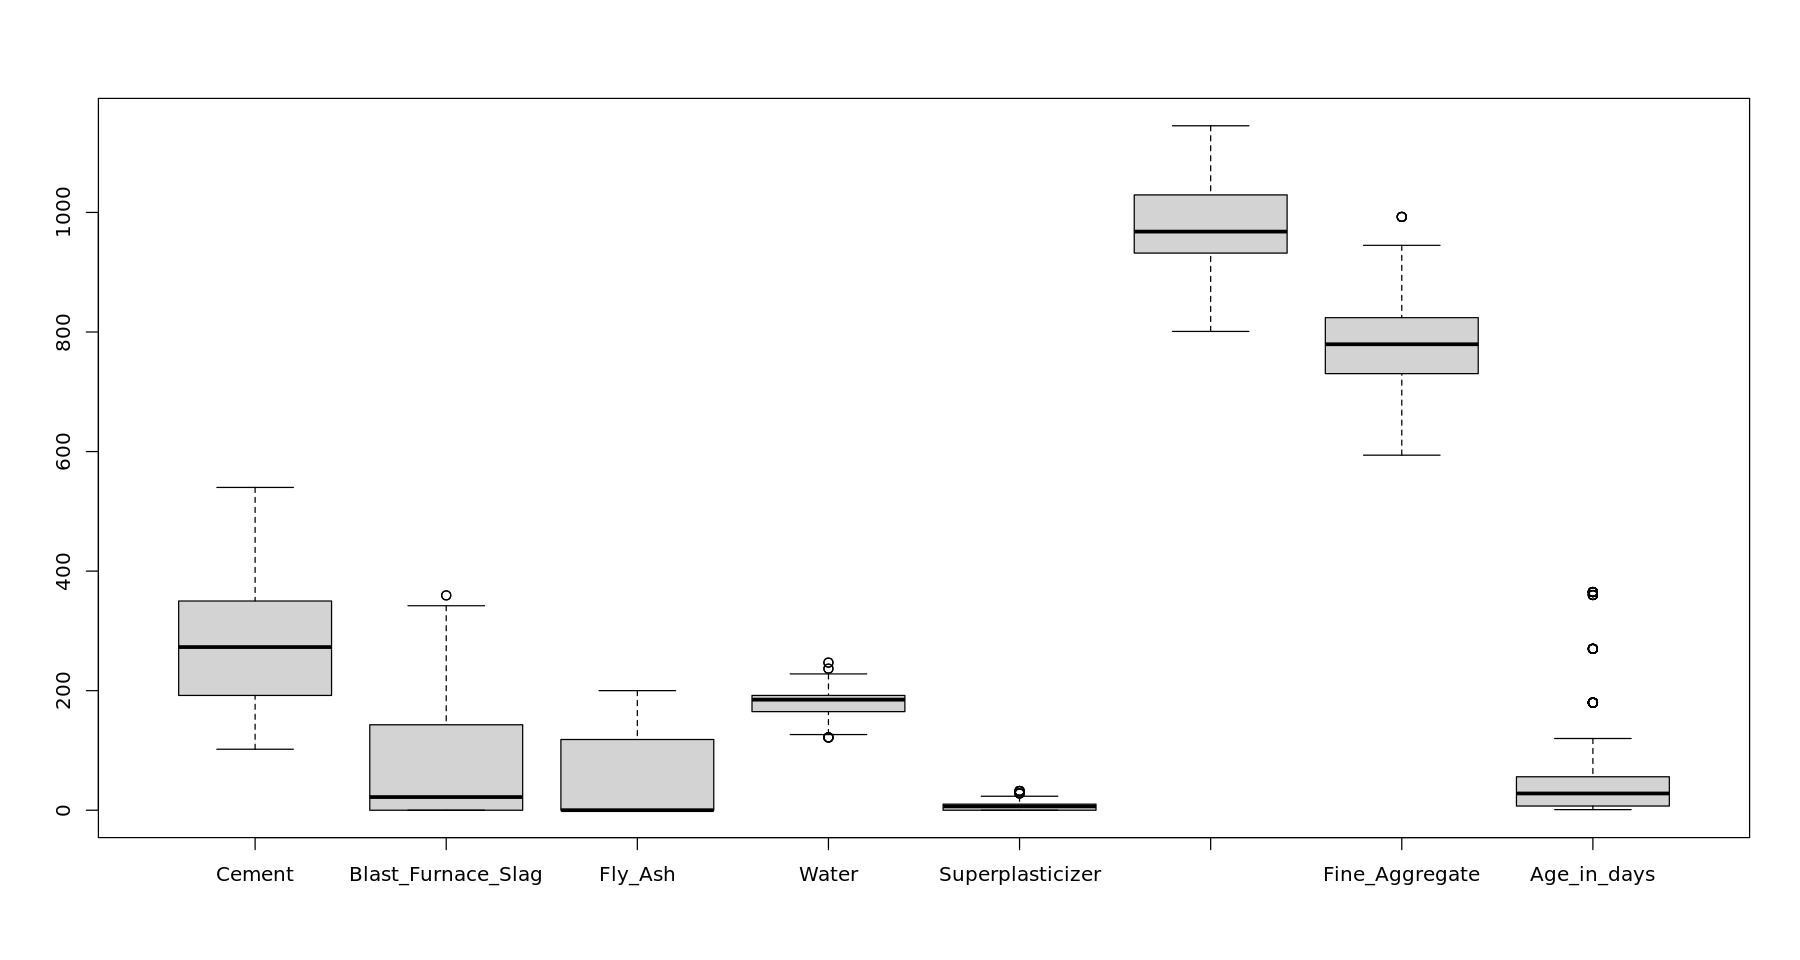

In [240]:
#checking correlation matrix and box plot to find residuals and correlation with all varaibles

options(repr.plot.width=15, repr.plot.height=8)
boxplot(raw_data[1:8])

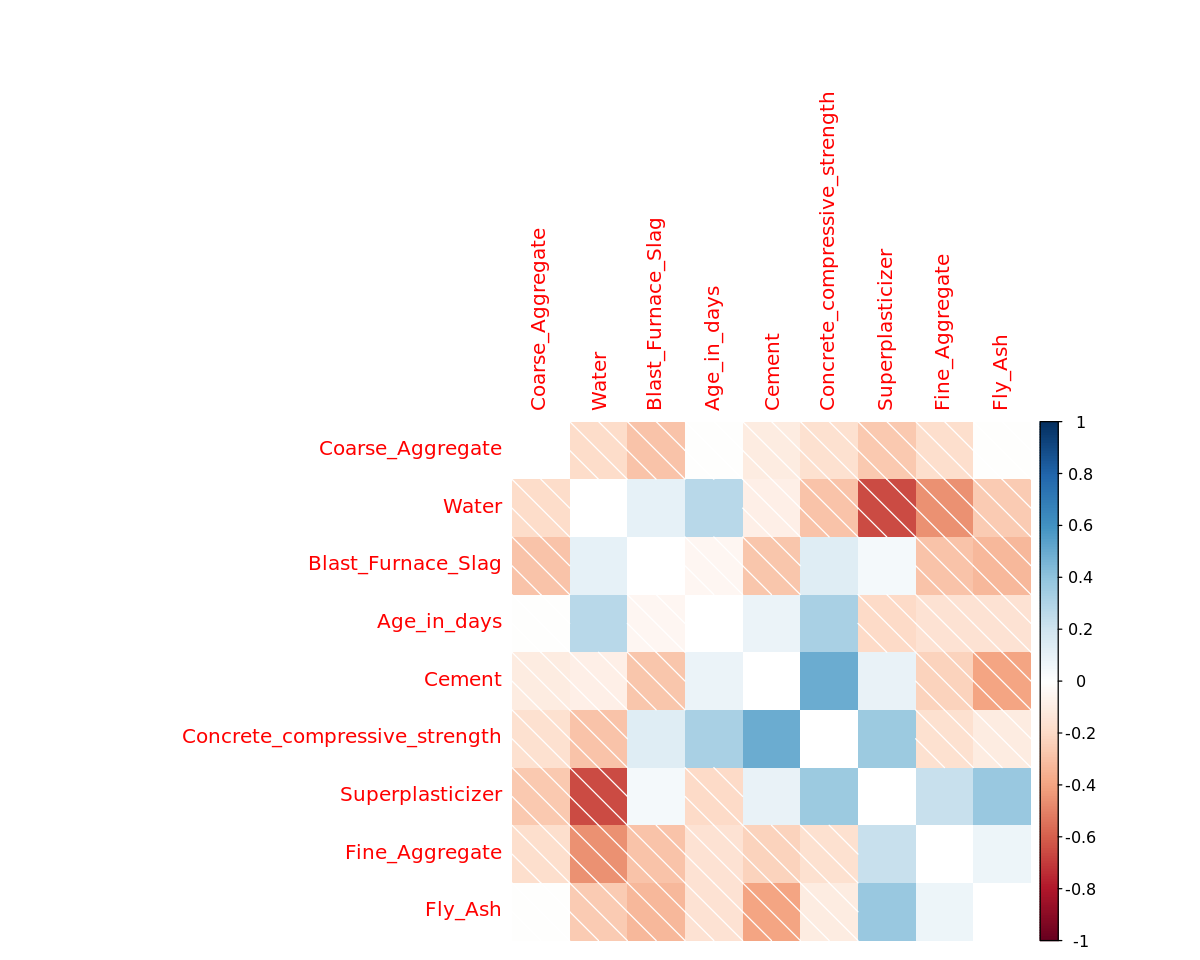

In [241]:
options(repr.plot.width=10, repr.plot.height=8)
corrplot(cor(raw_data),method = 'shade', order = 'AOE', diag = FALSE)

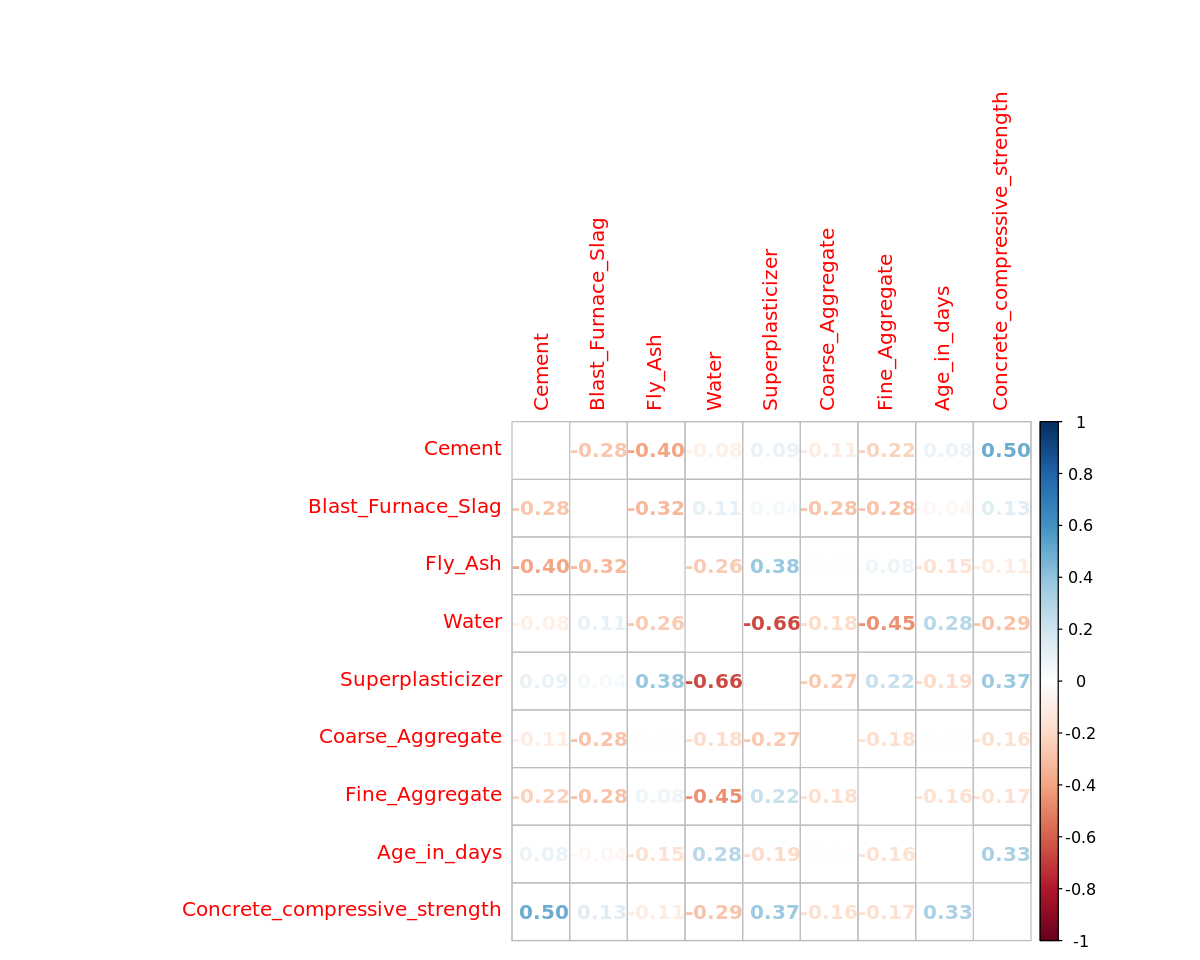

In [242]:
corrplot(cor(raw_data),method = 'number',diag = FALSE)

<h4> Pre-processing <br>
<h5>-  Splitting data into train and test data set <br>
    -  Standardizing the independent variables <br>
    -  Correlation values and direction with each variable

In [245]:
#splitting data to train and test

set.seed(1)
train_rows = sample(1:nrow(raw_data), size=0.7*nrow(raw_data))
validation_rows = setdiff(1:nrow(raw_data),train_rows)
train_data <- raw_data[train_rows,]
validation_data <- raw_data[validation_rows,]

In [246]:
dim(raw_data)
dim(train_data)
dim(validation_data)

[1] 1030    9

[1] 721   9

[1] 309   9

In [247]:
colnames(train_data)

[1] "Cement"                        "Blast_Furnace_Slag"           
[3] "Fly_Ash"                       "Water"                        
[5] "Superplasticizer"              "Coarse_Aggregate"             
[7] "Fine_Aggregate"                "Age_in_days"                  
[9] "Concrete_compressive_strength"

In [253]:
#converting all independent variables to standard format in train and test 

std_model <- preProcess(train_data[,c('Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age_in_days')], method = c("center","scale"))

In [254]:
train_data_std=train_data

In [255]:
validation_data_std=validation_data

In [256]:
train_data_std[,c('Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age_in_days')] <- predict(object = std_model, newdata = train_data_std[,c('Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age_in_days')])

In [257]:
validation_data_std[,c('Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age_in_days')] <- predict(object = std_model, newdata = validation_data_std[,c('Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer','Coarse_Aggregate','Fine_Aggregate','Age_in_days')])

In [258]:
summary(validation_data_std)

     Cement         Blast_Furnace_Slag    Fly_Ash             Water          
 Min.   :-1.73644   Min.   :-0.85510   Min.   :-0.84662   Min.   :-2.824695  
 1st Qu.:-0.87174   1st Qu.:-0.85510   1st Qu.:-0.84662   1st Qu.:-0.829497  
 Median :-0.16077   Median :-0.62158   Median :-0.84662   Median : 0.196469  
 Mean   :-0.05014   Mean   : 0.02568   Mean   : 0.01604   Mean   : 0.003587  
 3rd Qu.: 0.54060   3rd Qu.: 0.96051   3rd Qu.: 1.01216   3rd Qu.: 0.541610  
 Max.   : 2.47175   Max.   : 3.34123   Max.   : 2.21730   Max.   : 3.089979  
 Superplasticizer    Coarse_Aggregate   Fine_Aggregate      Age_in_days      
 Min.   :-1.051325   Min.   :-2.18052   Min.   :-2.28125   Min.   :-0.68453  
 1st Qu.:-1.051325   1st Qu.:-0.51476   1st Qu.:-0.67269   1st Qu.:-0.61833  
 Median :-0.020048   Median :-0.06462   Median : 0.07586   Median :-0.27079  
 Mean   :-0.007847   Mean   : 0.01853   Mean   :-0.02237   Mean   : 0.07172  
 3rd Qu.: 0.706917   3rd Qu.: 0.72376   3rd Qu.: 0.54070   3rd Q

<h4>  Model Building (methods and experiments done) <br>
<h5>    1. Building basic multiple linear regression model using standardized independent variables <br> <br>
        Model Evaluation: Adjusted R sqaured value = 61.06% <br>
                          Model is significant, hence we reject the null hypothesis <br>
                          Superplasticizer, Coarse_Aggregate and Fine_Aggregate shows significance values less than                           0.05. Hence we fail to reject the null hypothesis <br>
                          Prediction Evaluation shows RMSE value greater than 10 for both training(10.39) and test data                             set(10.33) <br>
                          Residual analysis shows non-linearity and heteroscedacity in residuals while it is fairly                           normalized
          


In [260]:
#mlr model building

basic_model_std = lm(Concrete_compressive_strength~., data = train_data_std)
options(scipen=999)
summary(basic_model_std)


Call:
lm(formula = Concrete_compressive_strength ~ ., data = train_data_std)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.510  -6.339   0.544   6.501  34.574 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)         35.9677     0.3897  92.304 < 0.0000000000000002 ***
Cement              12.2410     1.0382  11.791 < 0.0000000000000002 ***
Blast_Furnace_Slag   8.2307     1.0284   8.003  0.00000000000000493 ***
Fly_Ash              5.2452     0.9347   5.612  0.00000002871420468 ***
Water               -3.7460     1.0145  -3.693             0.000239 ***
Superplasticizer     1.2514     0.6686   1.872             0.061683 .  
Coarse_Aggregate     0.7761     0.8767   0.885             0.376343    
Fine_Aggregate       0.8200     1.0094   0.812             0.416842    
Age_in_days          7.1298     0.4125  17.286 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 

In [264]:
#predidicting and checking evaluation 
y_train_pred_std = basic_model_std$fitted.values
y_val_pred_std = predict(basic_model_std,validation_data_std)

In [265]:
regr.eval(train_data_std$Concrete_compressive_strength,y_train_pred_std)
regr.eval(validation_data_std$Concrete_compressive_strength,y_val_pred_std)

mae        mse       rmse       mape 
  8.183580 108.109712  10.397582   0.304133

mae         mse        rmse        mape 
  8.1954366 106.7520468  10.3320882   0.3290679

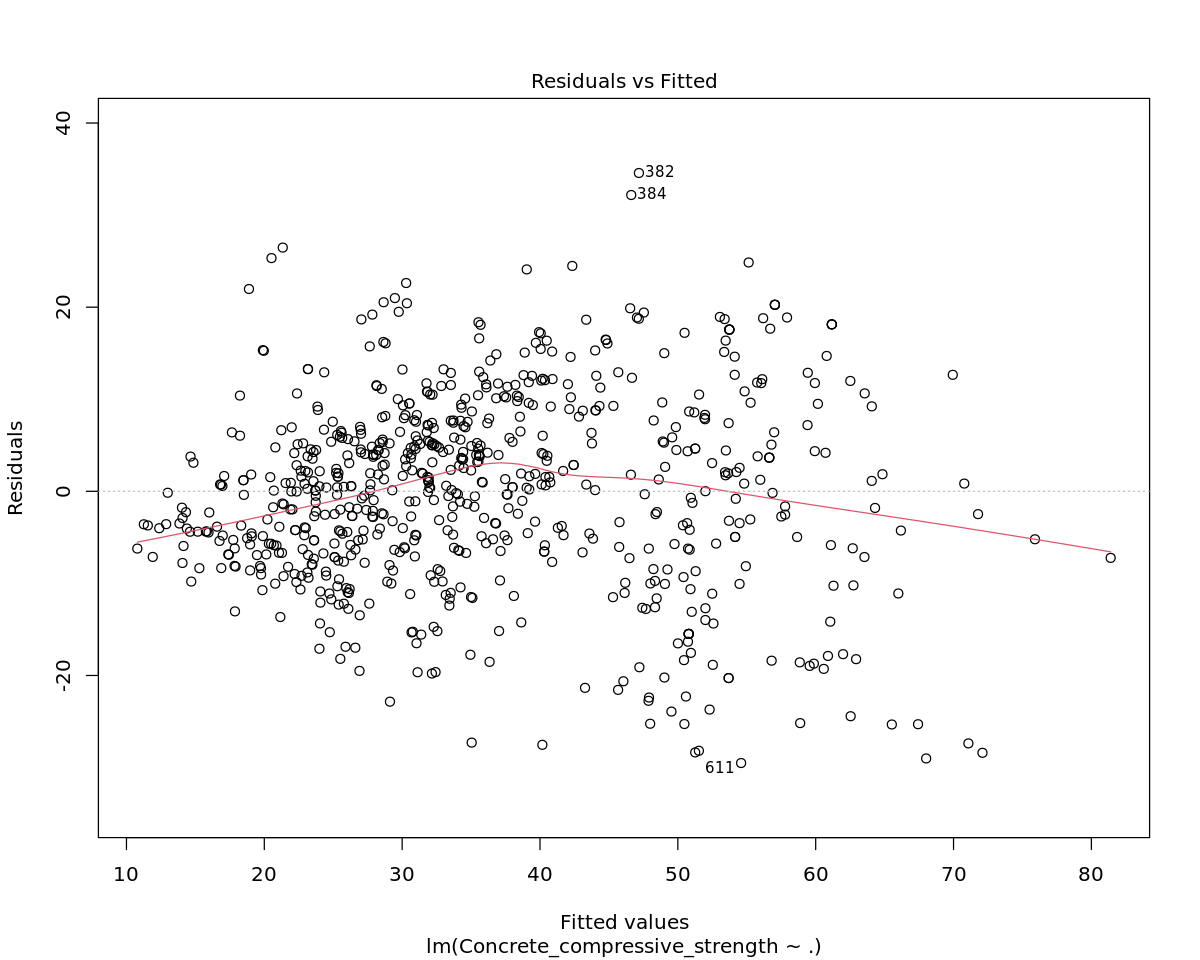

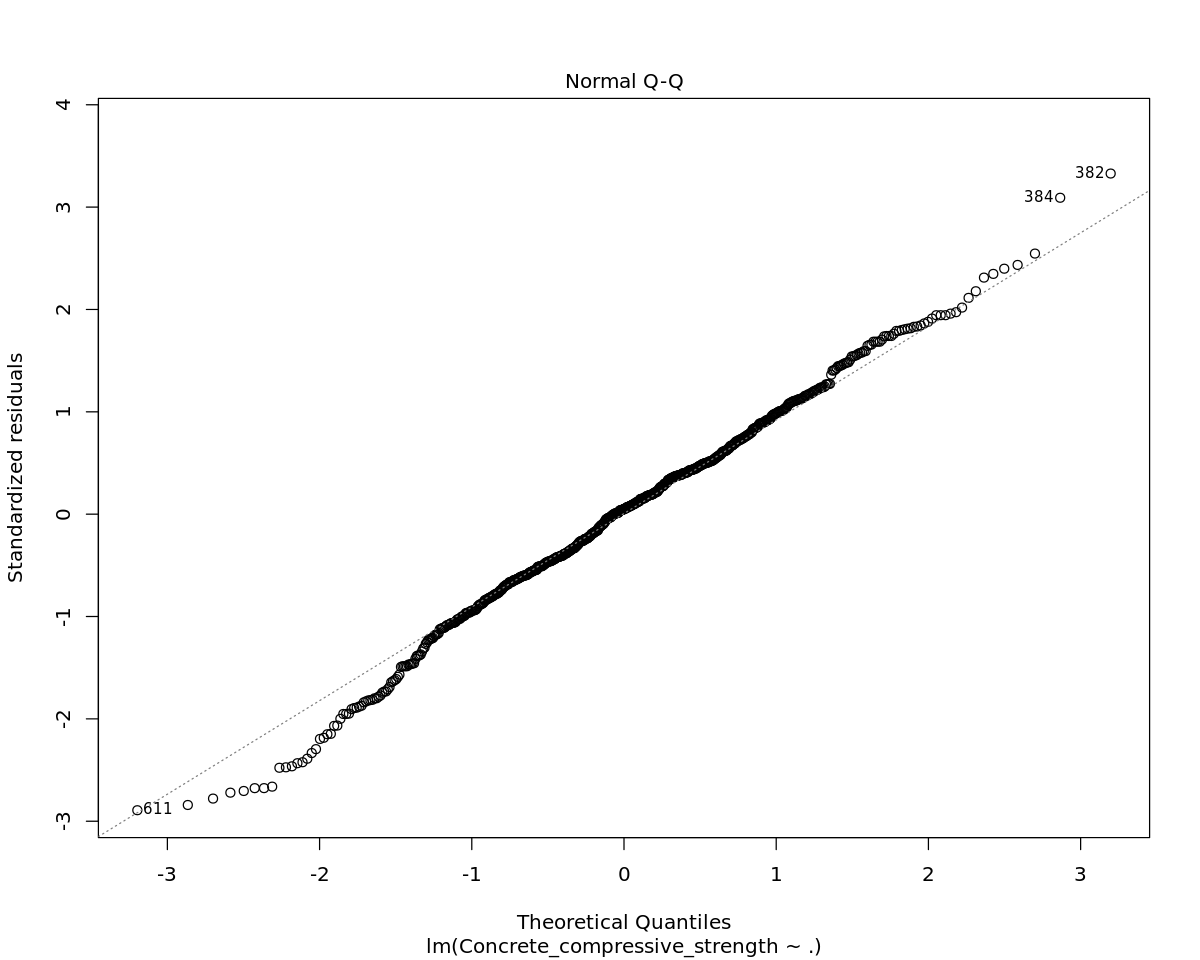

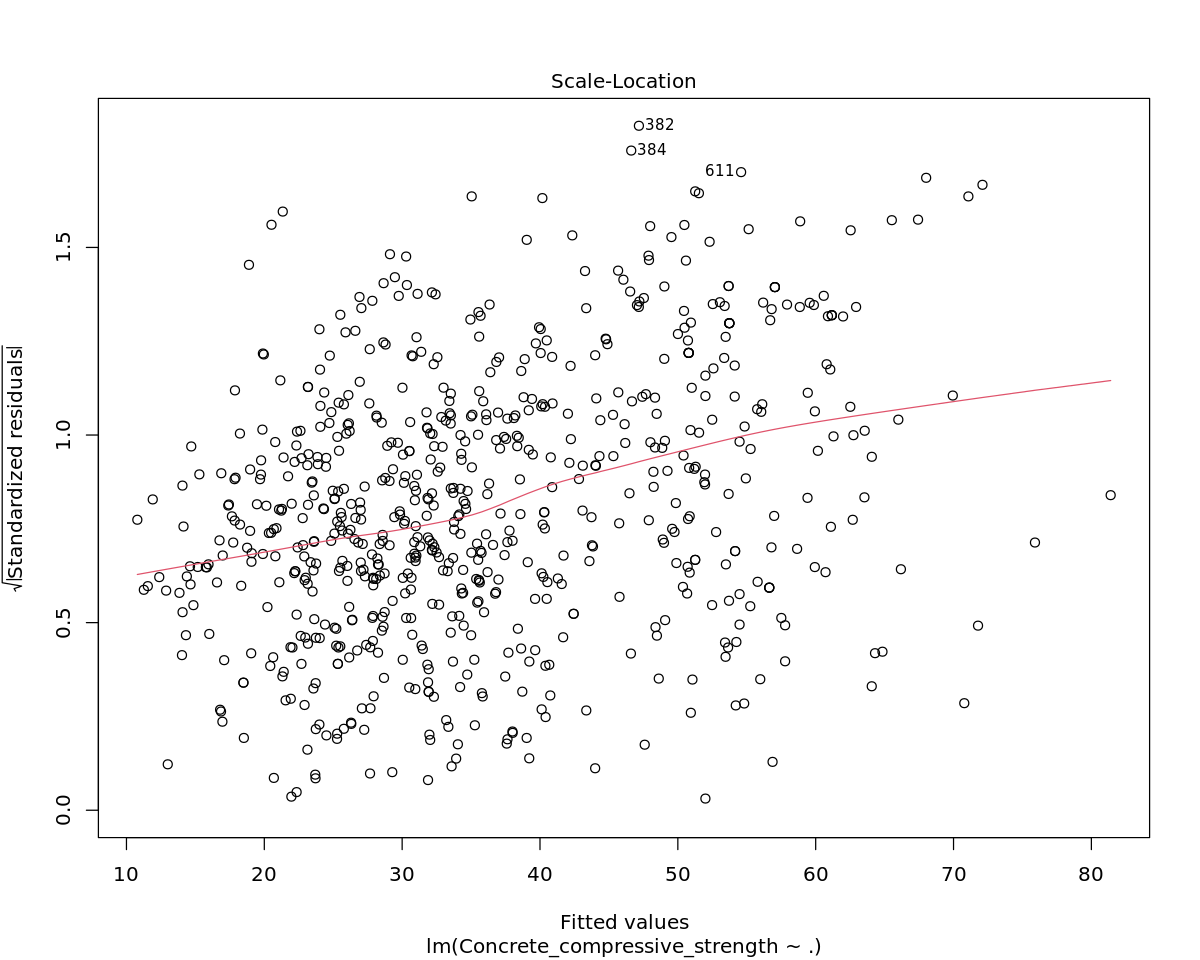

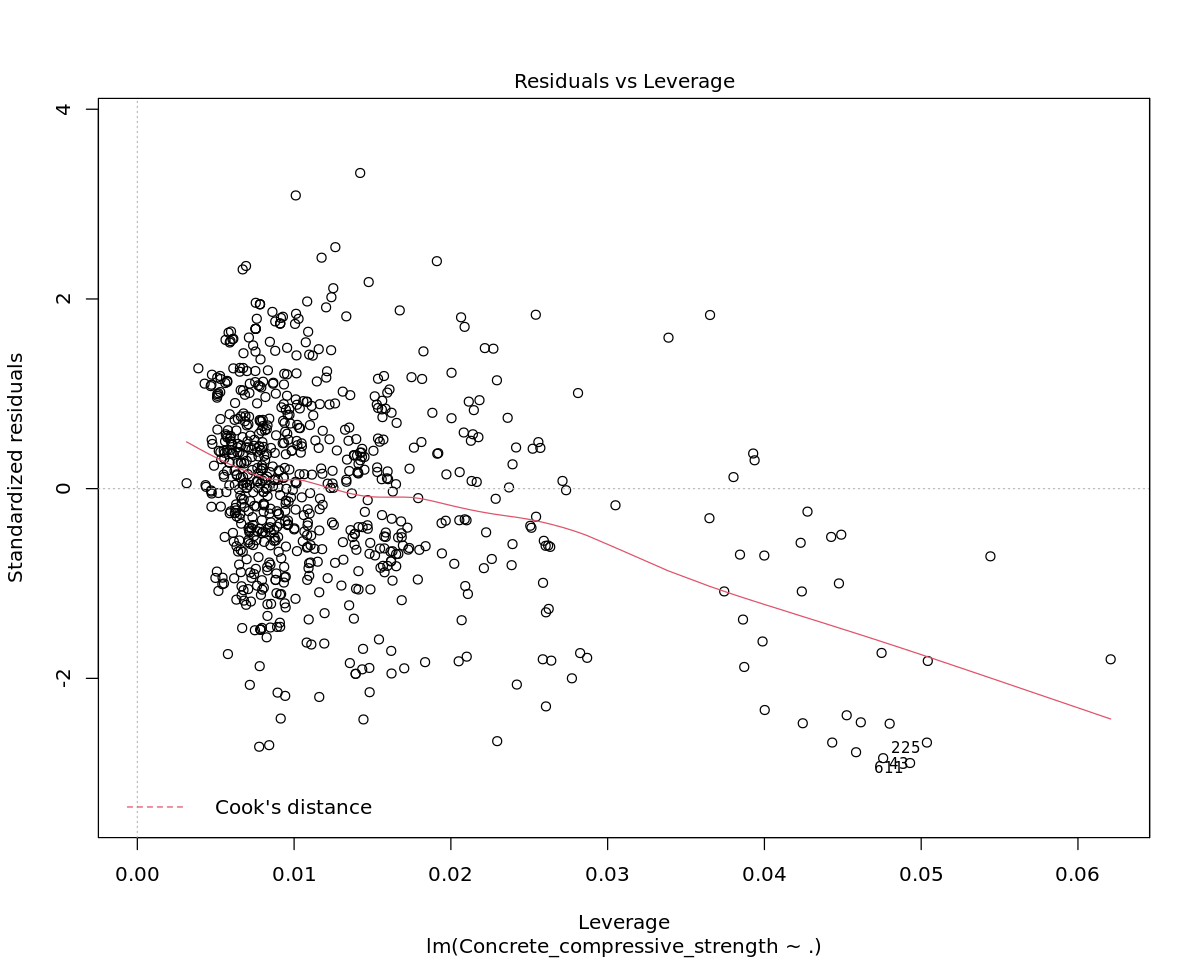

In [267]:
#residual analysis
plot(basic_model_std)

<h5> Checking multicollinearity using VIF.

In [268]:
 vif(basic_model_std)

Cement Blast_Furnace_Slag            Fly_Ash              Water 
          7.088312           6.956108           5.745888           6.768440 
  Superplasticizer   Coarse_Aggregate     Fine_Aggregate        Age_in_days 
          2.940406           5.055017           6.700665           1.118866

<h5> Tranformation: <br>
     -  Tried transformation to help the residual assumptions<br>
     -  Turkey Tranform gives 0.575 lamba with equation value (lambda >  0){TRANS = x ^ lambda} <br>
     -  MLR Regression on y tranformed and x standarized data gives very R sqaured value of 6% <br> 
     -  Log tranformation on y gives aa low R sqaured value then the model model of 55.9%


    lambda      W Shapiro.p.value
424  0.575 0.9922       0.0007475

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



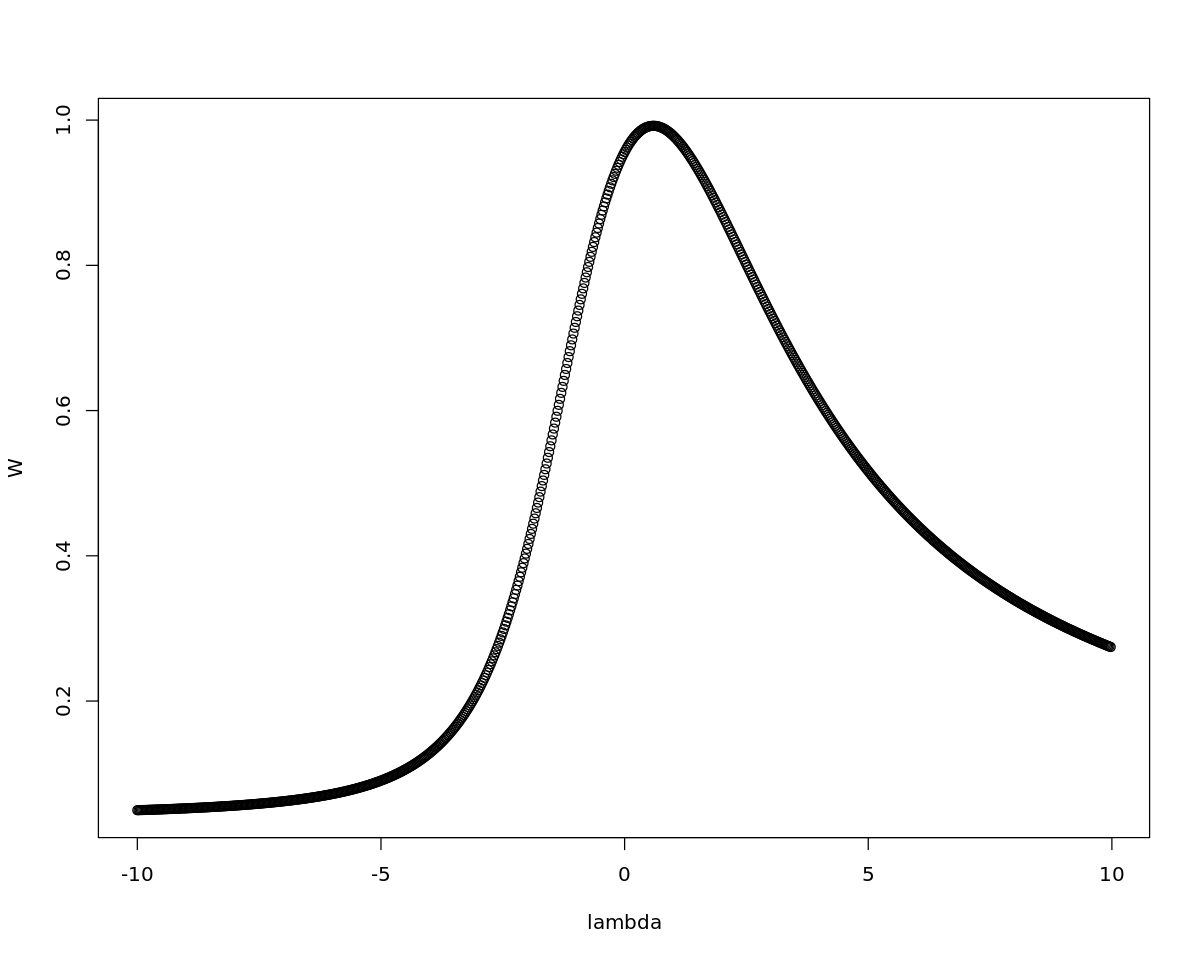

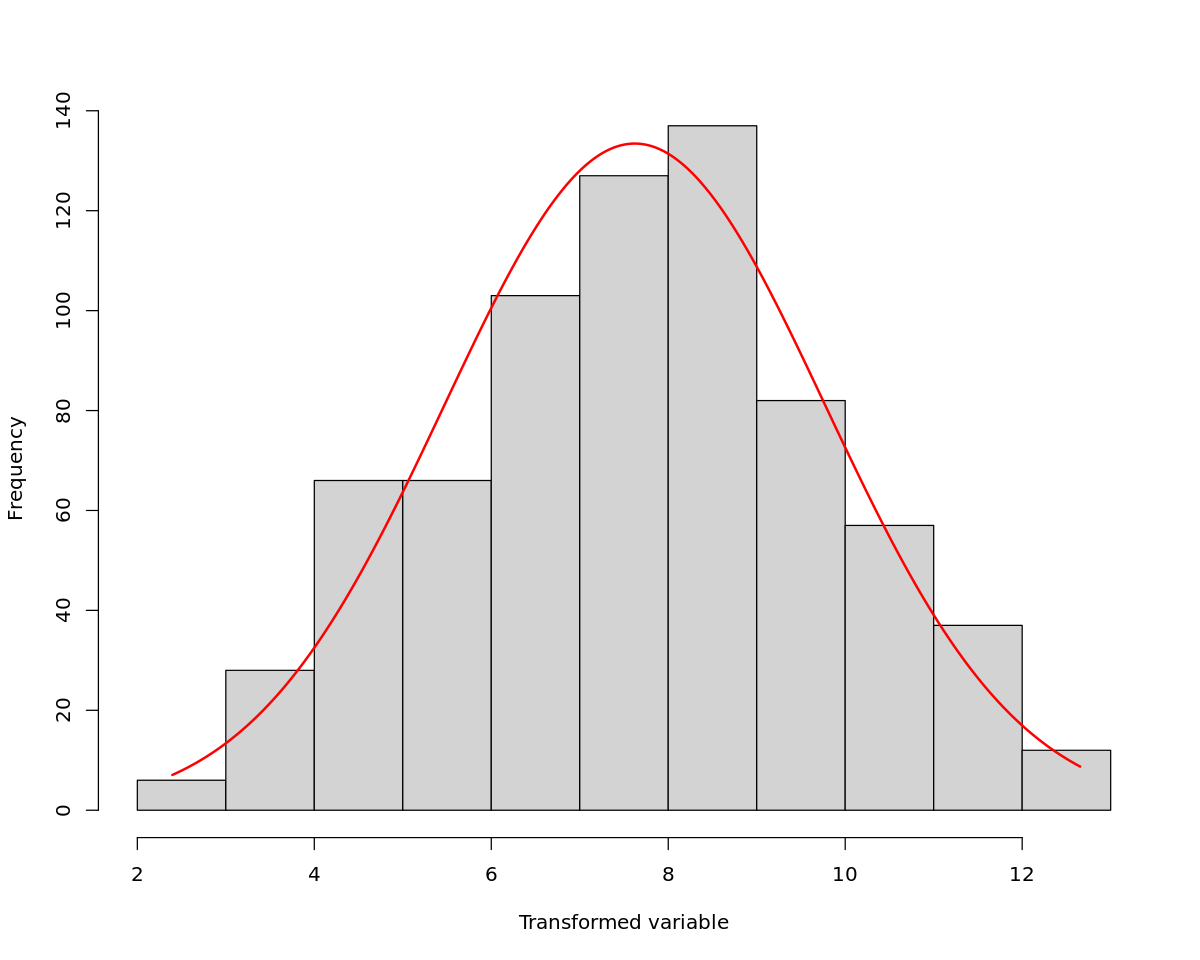

[1]  4.761528  8.195553 11.363761  5.900236  8.358324  9.278823  4.824721
  [8]  8.465548  6.349131  9.293219  4.821126  3.913766  7.021246  6.881328
 [15]  5.262912  8.538833  6.145772  4.066764  8.958937  3.831328  7.819943
 [22]  7.079617  7.518898  7.301700  7.259280  9.992222  4.880185  5.548701
 [29]  7.388621 12.579995  6.658921  7.430493  4.840872  4.506055  7.446151
 [36]  7.187278  8.611656  8.444184  6.426521  7.627056  8.097959 10.428934
 [43]  8.321155  6.195207  8.088152  6.785474  5.437693  9.694150  4.247296
 [50] 10.193193  7.881377  7.923798  8.292295  4.973948  8.291091  7.591130
 [57]  7.887626  8.604628  8.239190  5.548701  8.825148  4.393513  5.666071
 [64]  6.382801  4.317937  8.523505 10.380063  6.827272  2.473259  8.797519
 [71]  6.746290  6.517626 10.063369  9.394635  7.521487  6.782681  7.954883
 [78]  8.225875  7.379438  7.236670  4.848037 10.204559 10.478649  8.026656
 [85]  5.274697 12.361811  5.196893  8.279042 10.110248  7.761943  6.171275
 [92]  8.027890 11.016425  6.962515  6.641913  3.539702  7.565391  6.742082
 [99]  9.369357  4.672001  7.418734  7.205996  6.761704  4.044292 11.722076
[106] 10.625757  9.114865  8.570602  8.019254  4.005259  8.813644  7.505946
[113]  7.570544  6.644750  5.198593  6.439594  8.442996  9.139541  7.513719
[120]  8.313947  6.056648  3.141188  3.036255  6.172773  4.743358  7.422655
[127] 11.016425  6.684373  4.489023  6.259188  8.431108 10.318734  8.299517
[134]  8.219817  3.160882  9.356149  8.304329  7.766999  7.461783  4.183768
[141] 10.389239  7.561525  4.479540  8.219817 12.423545  5.318301  7.322842
[148]  7.560236 10.722666  3.267621  9.565862  8.752484  4.387734 10.185955
[155]  9.886909  6.877181 10.135184  9.547431  7.659027  7.129559 10.114407
[162]  6.782681  6.547786  7.845061  4.839079  6.297641  8.074652  5.291499
[169]  8.626868  9.306494  7.099895  8.820548  8.387016 11.628575  5.597155
[176]  7.995778  7.332077  5.504822  6.530564  5.769087  7.539588  9.229973
[183] 11.628575  6.988511  9.339619  8.842384 11.215189  8.019254 10.559444
[190]  8.364307  8.166365  6.232464  7.667961  8.407296  8.659564  4.209662
[197]  5.892490  4.169775  4.496599  9.866805  7.494275  4.660951  9.795672
[204]  9.066491  5.783244  8.154181  7.906351  4.597966  6.775694 11.628575
[211]  3.833458 10.073800  7.066074  6.186241  8.247656  7.310955  7.478692
[218] 10.869294 10.162147  4.265038 10.735605  4.209662  9.537663  6.620607
[225]  9.786087  5.786386 11.094305  5.316628 10.488773  8.739751 11.202662
[232]  4.470042  6.770100 10.559444  7.633458  9.532233  6.127723  6.088481
[239]  4.839079  6.930949  8.270601 10.083182  9.595081  6.343262 10.639784
[246]  5.291499  8.842384  7.156448  7.477392  8.191908  6.100575  9.490891
[253]  6.904793  7.461783  9.592919 11.897305  8.908797  8.015550  8.297110
[260]  4.066764  7.518898  6.728040  9.900646 10.042482  6.641913  7.518898
[267]  7.669237  3.675578  9.241092  7.263265  9.336310  9.669453  8.270601
[274]  5.643702  9.878448 10.247871  8.787141  9.744474  3.926335  7.388621
[281]  5.493404 10.043527  6.448299  9.940722  9.711304  5.995670 10.037255
[288]  9.175346  8.304329  8.834344 11.164052  7.995778  8.933893  6.232464
[295]  5.191789  5.991078  3.690933  6.749094  6.186241  5.963472  8.544723
[302] 11.895461  7.556368  4.970434  7.949915  6.859189  9.460343  6.217581
[309]  8.275425  8.293499 10.208690  5.906427  8.074652  3.701872  4.165771
[316]  7.969772  9.082262  5.767513 10.459392 10.843641  4.708694 11.970903
[323]  8.375070  7.736626  5.737536  7.893871  8.855008  5.140542  8.258530
[330]  8.508157  6.470023  3.920054  9.875274  8.088152  4.405055  7.350522
[337]  5.981886 11.045678  8.471475  5.262912  4.635093  9.597242  4.089144
[344]  8.174886 12.361811 10.126877  4.750632  9.026976  8.421589  8.008140
[351] 10.780304  8.086925  8.842384  3.046363  5.836495  2.395807  4.761528
[358]  7.546045  8.523505  6.941941  8.738593  4.679356  9.754089  7.518898
[365] 10.227263  6.649003  7.507242  7.967292  8.1

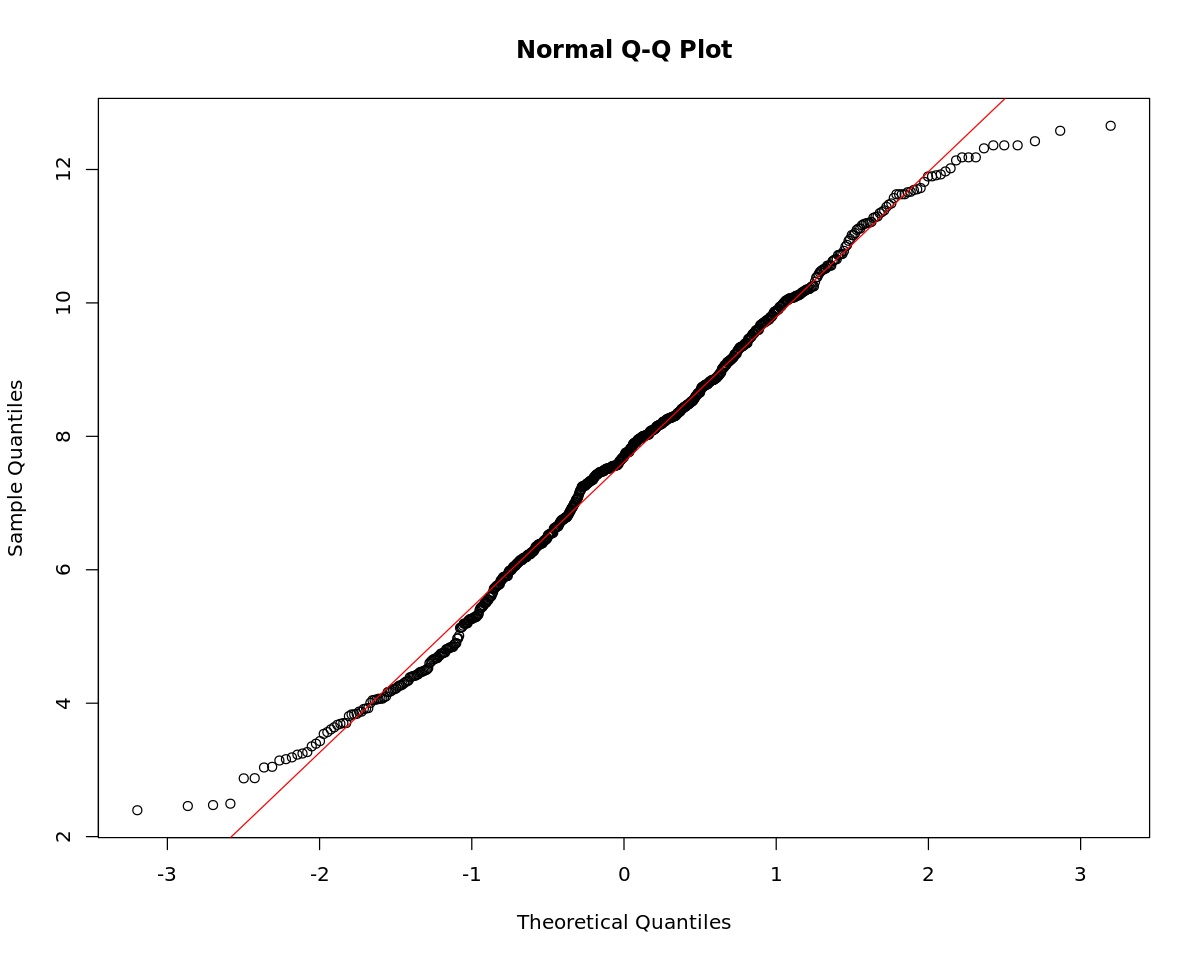

In [269]:
#turkey tranformation of y

transformTukey(train_data_std$Concrete_compressive_strength)

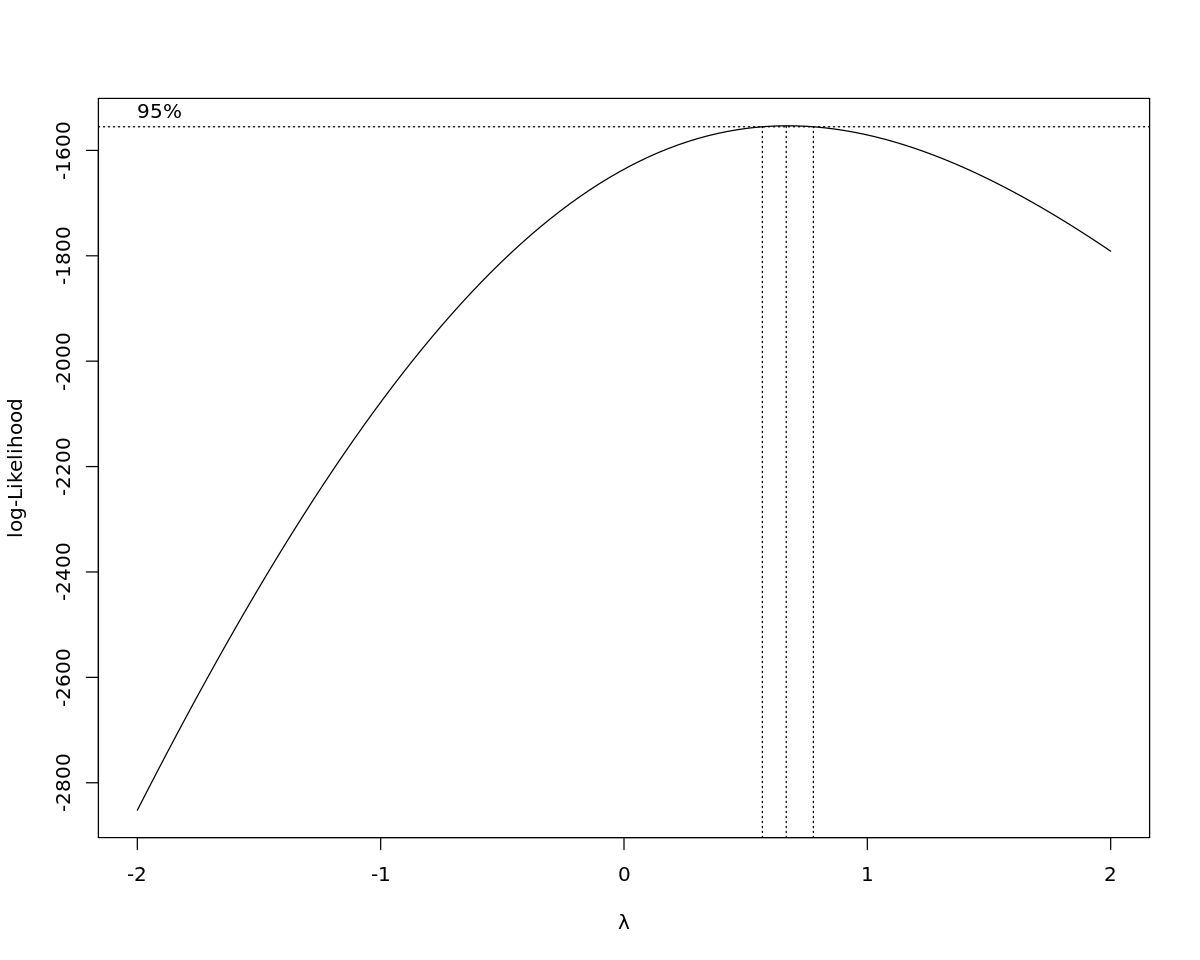

In [270]:
boxcox(basic_model_std)

In [271]:
basic_model_turkey = lm(0.575^(Concrete_compressive_strength)~., data = train_data_std)
options(scipen=999)
summary(basic_model_turkey)


Call:
lm(formula = 0.575^(Concrete_compressive_strength) ~ ., data = train_data_std)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.005051 -0.001608 -0.000635  0.000362  0.073911 

Coefficients:
                      Estimate  Std. Error t value  Pr(>|t|)    
(Intercept)         0.00087429  0.00021215   4.121 0.0000422 ***
Cement             -0.00143581  0.00056522  -2.540   0.01129 *  
Blast_Furnace_Slag -0.00044949  0.00055993  -0.803   0.42238    
Fly_Ash            -0.00106720  0.00050890  -2.097   0.03634 *  
Water              -0.00036059  0.00055232  -0.653   0.51406    
Superplasticizer   -0.00073745  0.00036404  -2.026   0.04317 *  
Coarse_Aggregate   -0.00071525  0.00047732  -1.498   0.13445    
Fine_Aggregate      0.00006068  0.00054955   0.110   0.91211    
Age_in_days        -0.00069212  0.00022456  -3.082   0.00214 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005697 on 712 degrees of freedom
Multipl

In [272]:
basic_model_log= lm(log(Concrete_compressive_strength)~., data = train_data_std)
options(scipen=999)
summary(basic_model_log)


Call:
lm(formula = log(Concrete_compressive_strength) ~ ., data = train_data_std)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36452 -0.22778  0.07258  0.27076  0.83123 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)         3.45344    0.01349 255.953 < 0.0000000000000002 ***
Cement              0.38618    0.03595  10.743 < 0.0000000000000002 ***
Blast_Furnace_Slag  0.25609    0.03561   7.191     0.00000000000163 ***
Fly_Ash             0.19576    0.03236   6.049     0.00000000236052 ***
Water              -0.07950    0.03513  -2.263               0.0239 *  
Superplasticizer    0.05497    0.02315   2.374               0.0178 *  
Coarse_Aggregate    0.03069    0.03036   1.011               0.3123    
Fine_Aggregate      0.02071    0.03495   0.593               0.5536    
Age_in_days         0.23395    0.01428  16.381 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

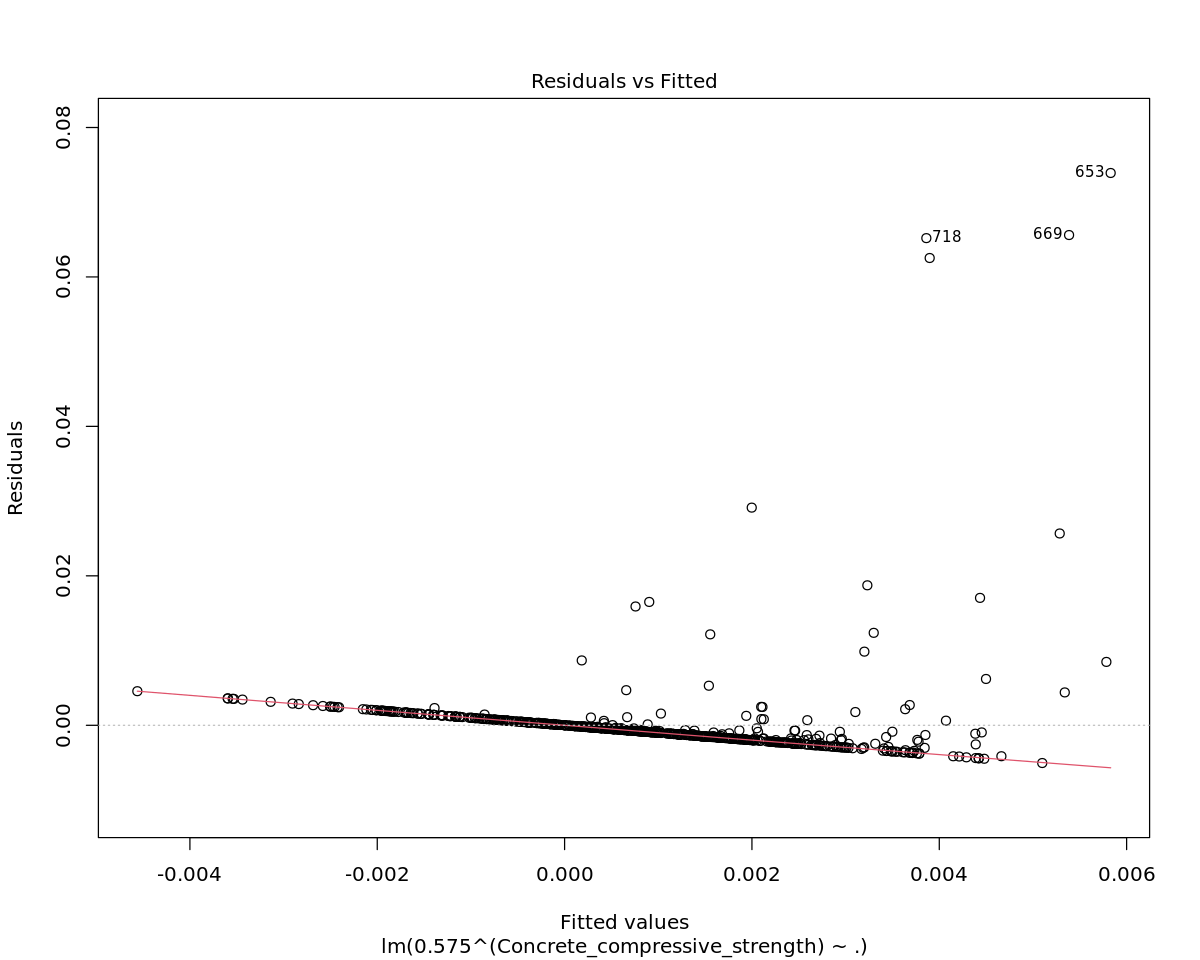

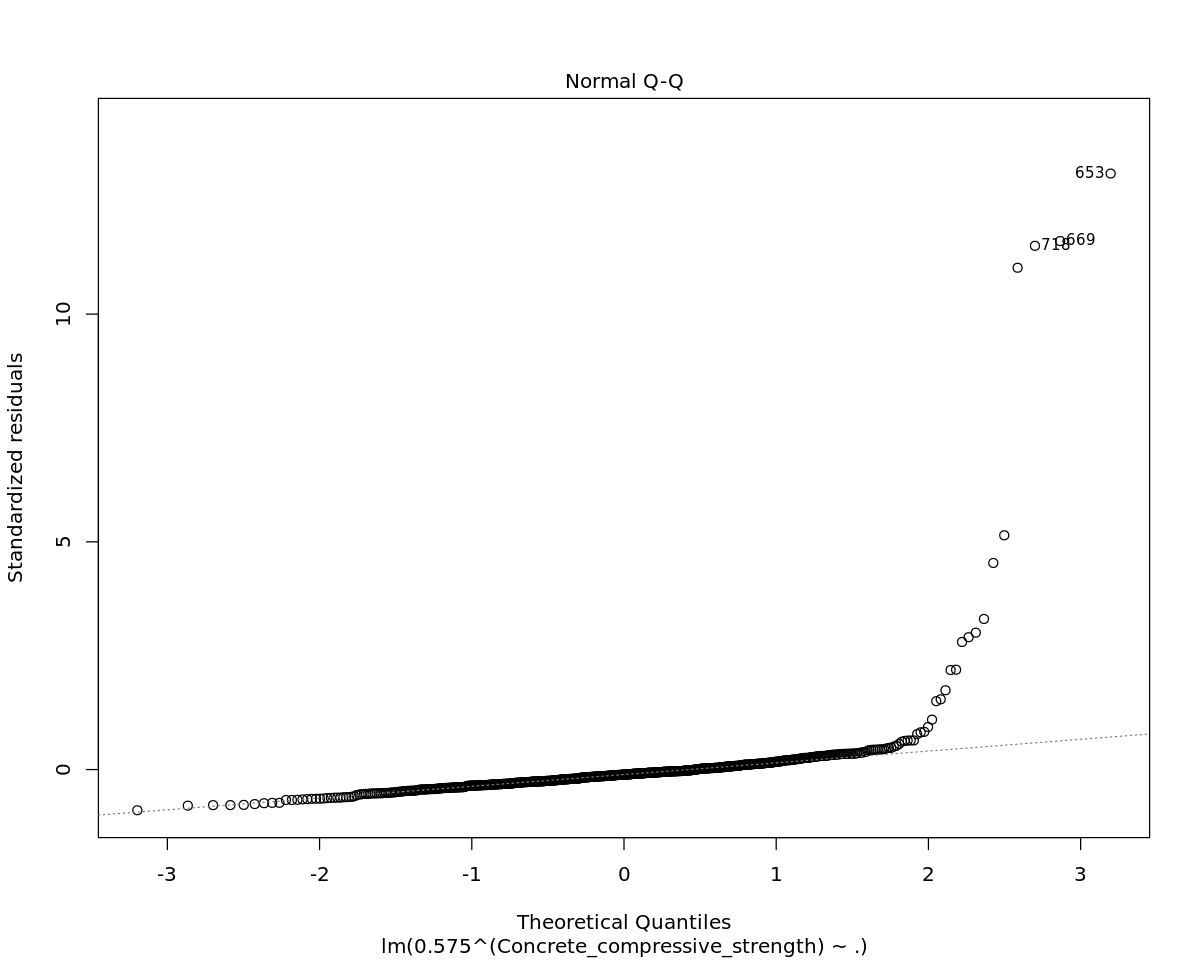

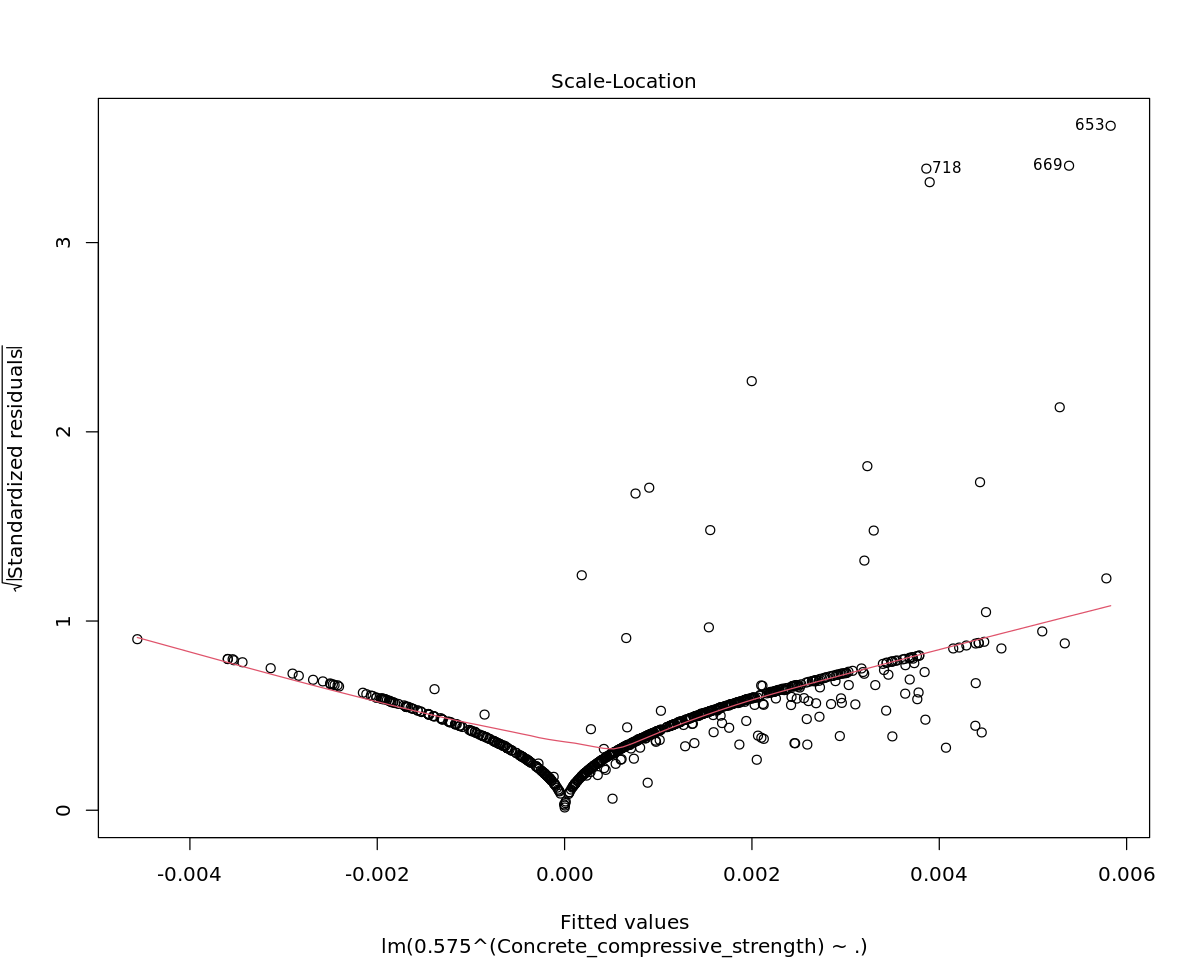

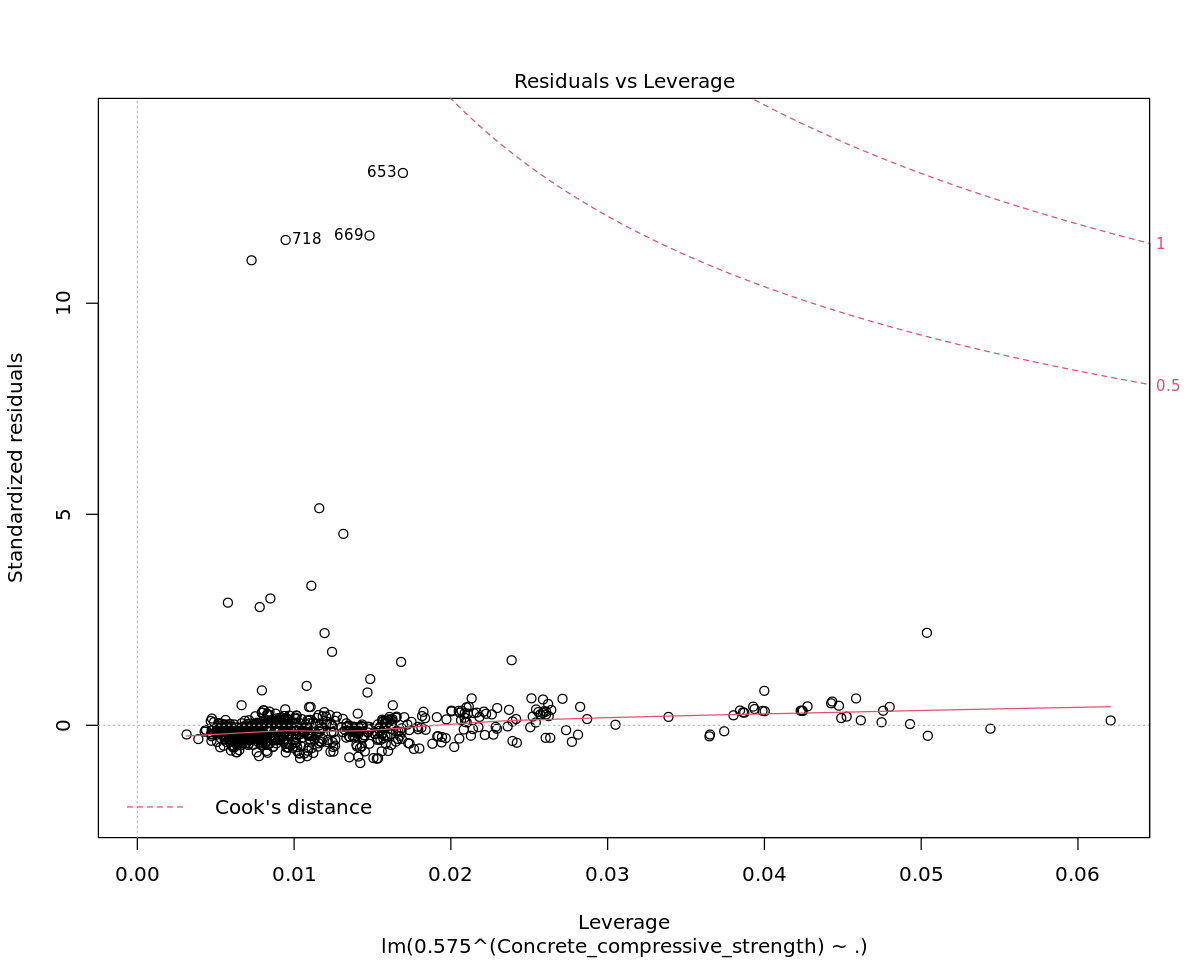

In [273]:
plot(basic_model_turkey)

<h5> Step AIC: <br>
    Gives a final value of 3391.36 with significant independent variables as: Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + Fly_Ash + Water + Superplasticizer + Age_in_days <br>
    Model Evalutaion:  <br>
       - Model using AIC gives Adjusted R sqaured value of 61.13% <br>
       - Model is significant, hence we reject the null hypothesis <br>
       - Superplasticizer  shows significance values less than  0.05. Hence we fail to reject the null hypothesis <br>
       - Prediction Evaluation shows RMSE value greater than 10 for both training(10.39) and test data          set(10.33) <br>
       - Residual analysis shows non-linearity and heteroscedacity in residuals while it is fairly                          normalized <br>

    

In [274]:
stepAIC(basic_model_std)

Start:  AIC=3394.55
Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + 
    Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + 
    Age_in_days

                     Df Sum of Sq    RSS    AIC
- Fine_Aggregate      1        72  78019 3393.2
- Coarse_Aggregate    1        86  78033 3393.3
<none>                             77947 3394.5
- Superplasticizer    1       383  78331 3396.1
- Water               1      1493  79440 3406.2
- Fly_Ash             1      3447  81395 3423.8
- Blast_Furnace_Slag  1      7012  84959 3454.7
- Cement              1     15220  93167 3521.2
- Age_in_days         1     32712 110659 3645.2

Step:  AIC=3393.22
Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + 
    Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Age_in_days

                     Df Sum of Sq    RSS    AIC
- Coarse_Aggregate    1        16  78035 3391.4
<none>                             78019 3393.2
- Superplasticizer    1       337  78356 3


Call:
lm(formula = Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + 
    Fly_Ash + Water + Superplasticizer + Age_in_days, data = train_data_std)

Coefficients:
       (Intercept)              Cement  Blast_Furnace_Slag             Fly_Ash  
            35.968              11.471               7.461               4.624  
             Water    Superplasticizer         Age_in_days  
            -4.513               1.059               7.106  


In [275]:
model_aic=lm(formula = Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + 
    Fly_Ash + Water + Superplasticizer + Age_in_days, data = train_data_std)

In [276]:
summary(model_aic)


Call:
lm(formula = Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + 
    Fly_Ash + Water + Superplasticizer + Age_in_days, data = train_data_std)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.592  -6.461   0.422   6.629  34.770 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)         35.9677     0.3893  92.381 < 0.0000000000000002 ***
Cement              11.4710     0.5220  21.974 < 0.0000000000000002 ***
Blast_Furnace_Slag   7.4609     0.5143  14.508 < 0.0000000000000002 ***
Fly_Ash              4.6239     0.5842   7.915 0.000000000000009453 ***
Water               -4.5126     0.5389  -8.374 0.000000000000000294 ***
Superplasticizer     1.0586     0.6072   1.743               0.0817 .  
Age_in_days          7.1057     0.4095  17.352 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.45 on 714 degrees of freedom
Multiple R-squared:  0.6145,	A

In [277]:
y_train_pred_aic = model_aic$fitted.values
y_val_pred_aic = predict(model_aic,validation_data_std)

In [278]:
regr.eval(train_data_std$Concrete_compressive_strength,y_train_pred_aic)
regr.eval(validation_data_std$Concrete_compressive_strength,y_val_pred_aic)

mae         mse        rmse        mape 
  8.2082359 108.2316418  10.4034437   0.3051827

mae         mse        rmse        mape 
  8.2279456 107.5704668  10.3716183   0.3299098

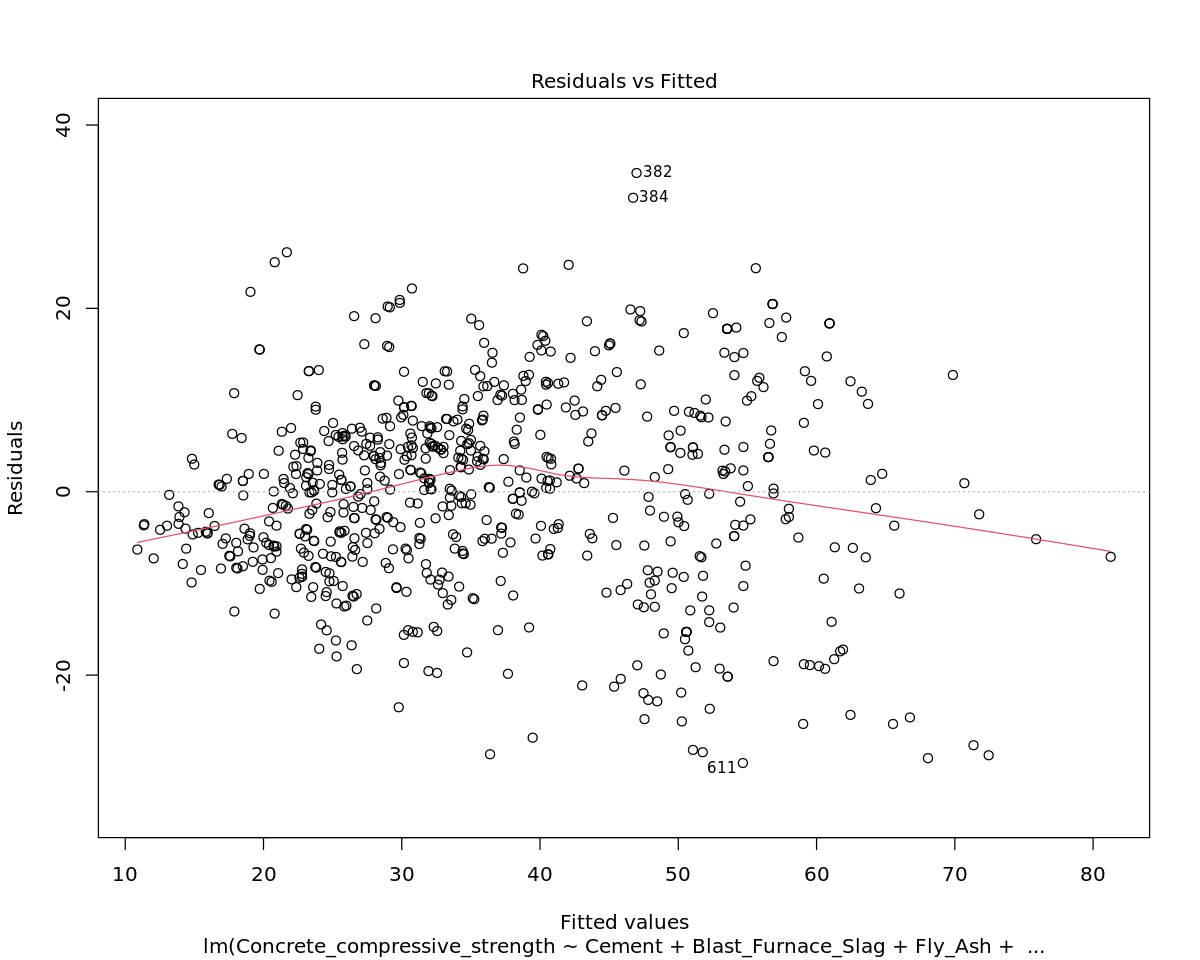

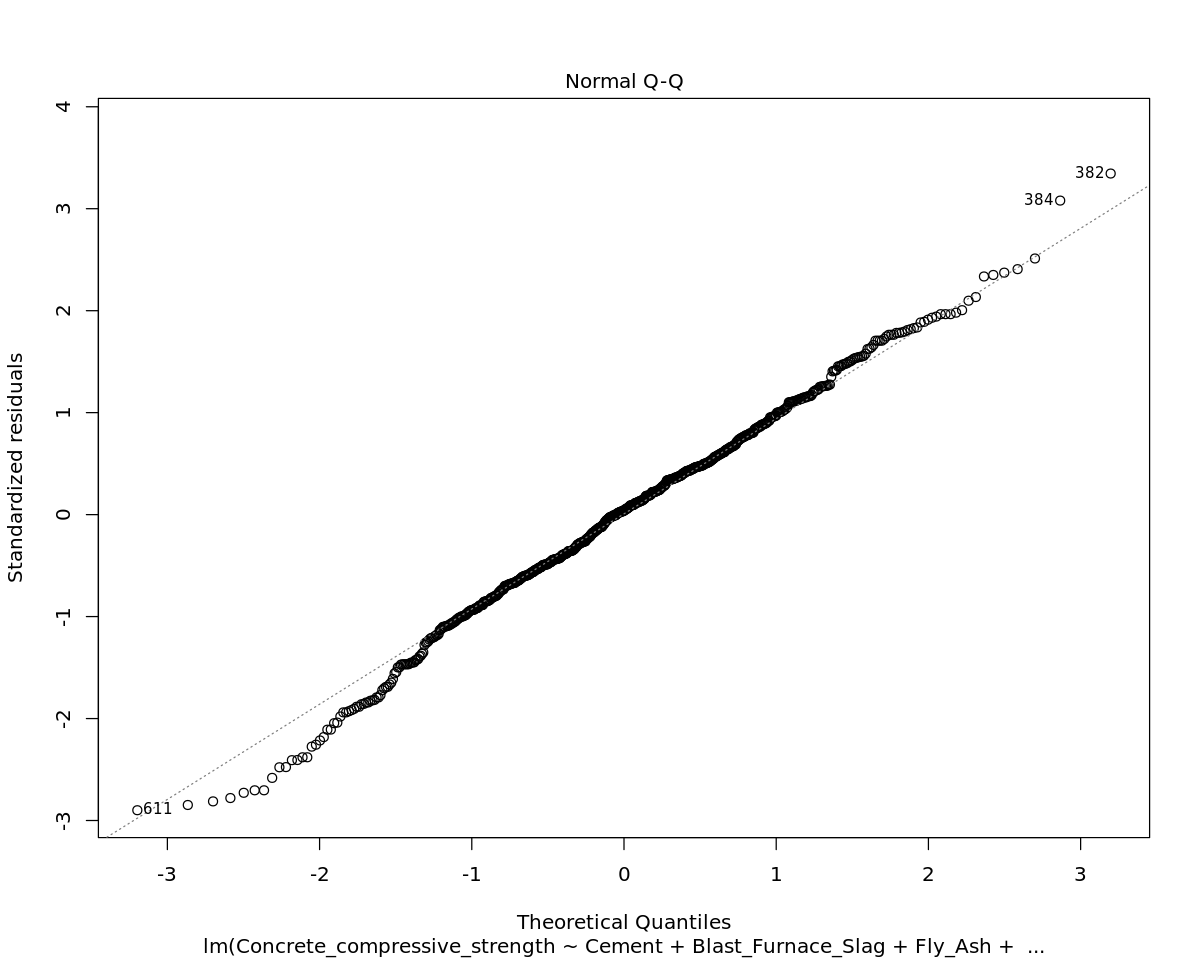

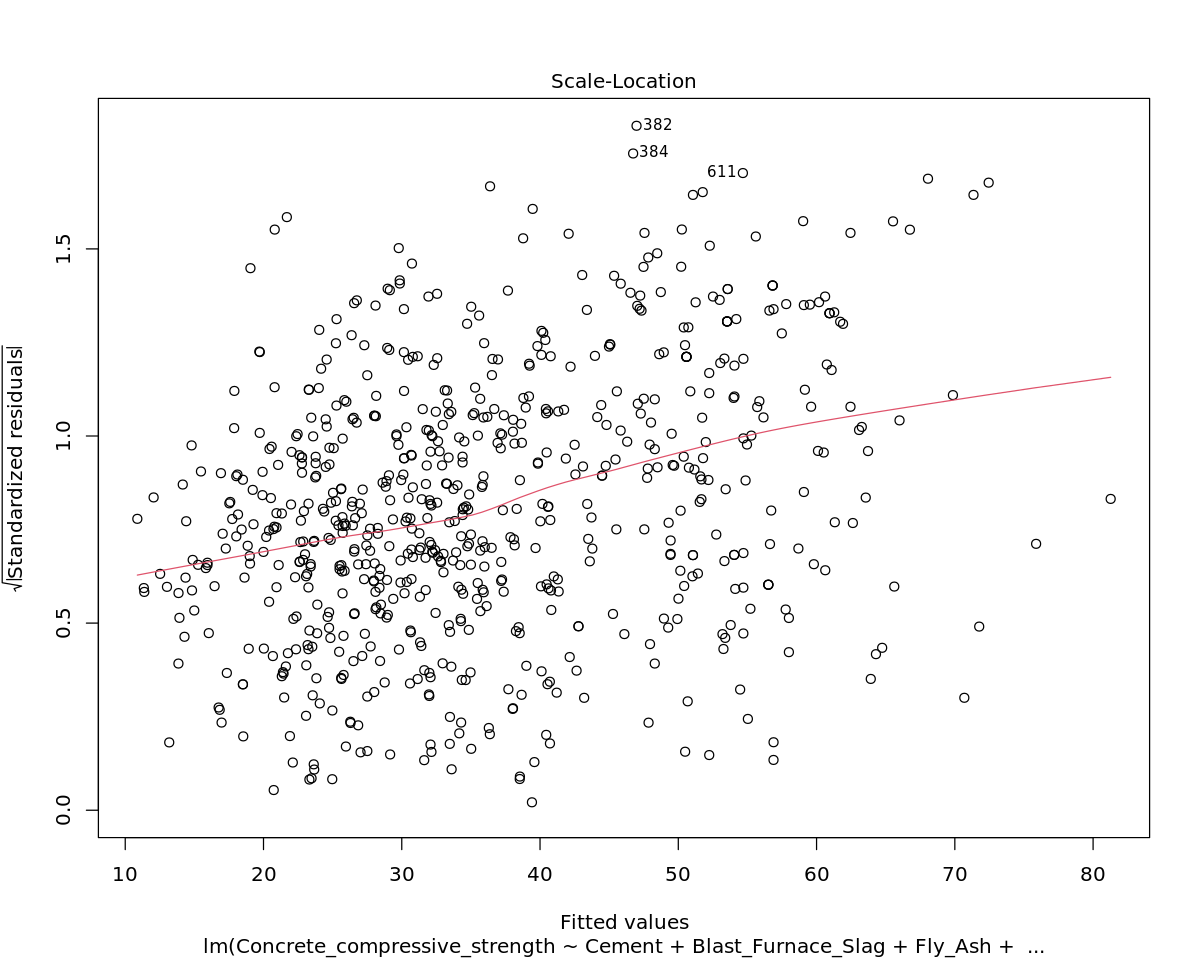

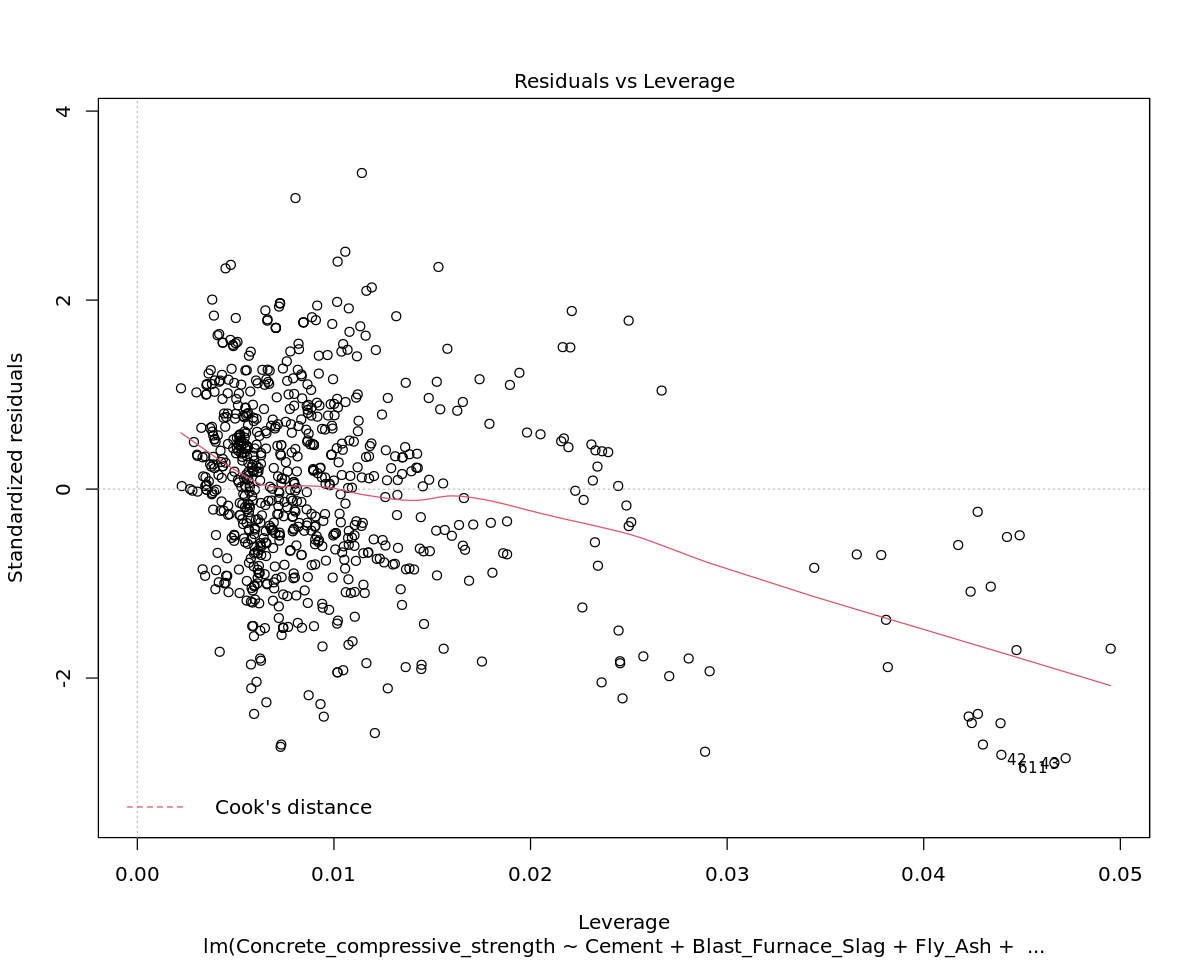

In [279]:
plot(model_aic)

In [280]:
vif(model_aic)

Cement Blast_Furnace_Slag            Fly_Ash              Water 
          1.795198           1.742181           2.248338           1.913044 
  Superplasticizer        Age_in_days 
          2.429020           1.104681

<h5> Ridge and Lasso Regularization: <br>
    Both regularization have decreased the R value to 58-59% and high error

In [282]:
#mlr with ridge regulazrization using cross validation with 5 folds

set.seed(1)
ridge_model_cv <- cv.glmnet(as.matrix(train_data_std[,-9]),as.matrix(train_data_std[,9]),alpha = 0,nfolds=5)

Warning message in plot.window(...):
“"xvar" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"xvar" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xvar" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xvar" is not a graphical parameter”
Warning message in box(...):
“"xvar" is not a graphical parameter”
Warning message in title(...):
“"xvar" is not a graphical parameter”


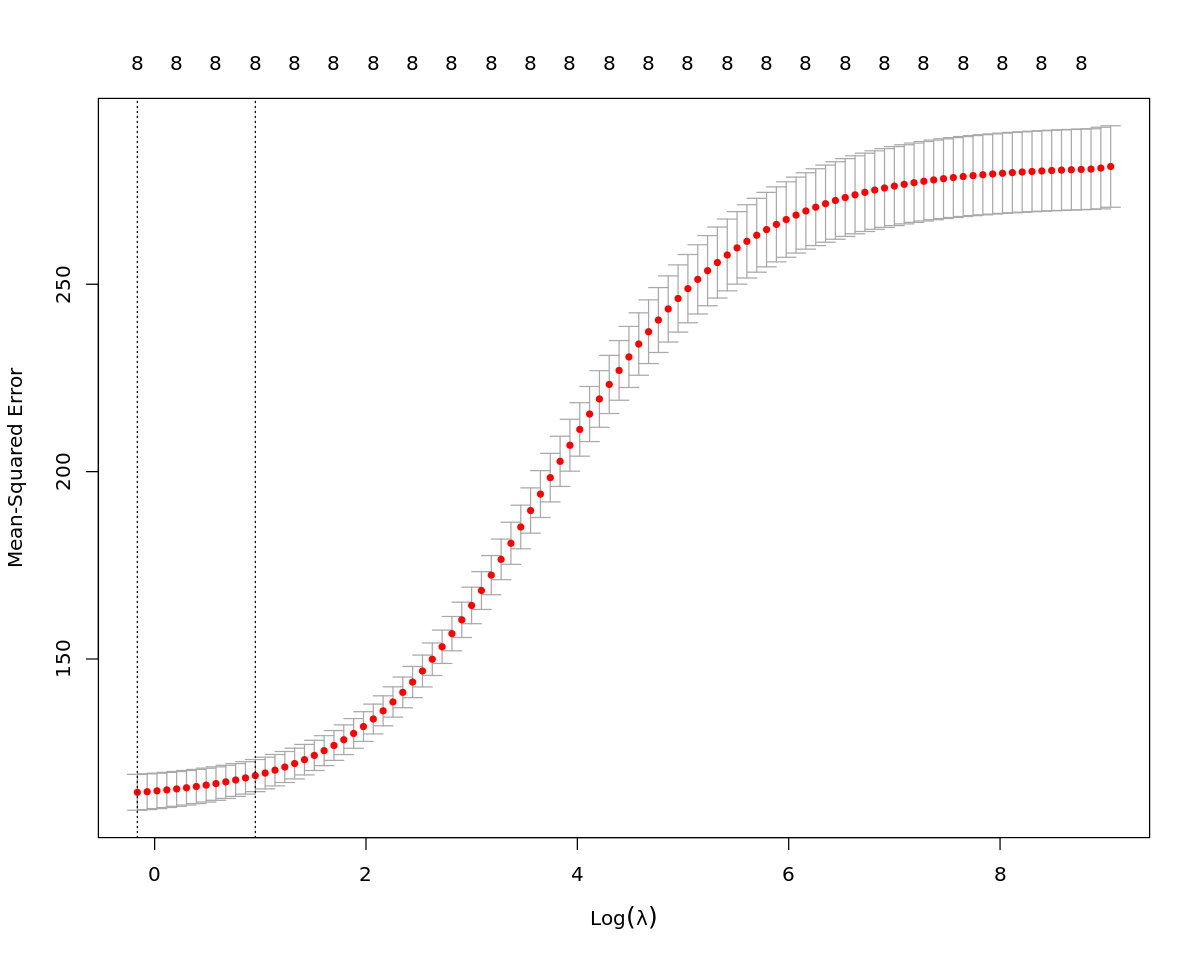

In [283]:
plot(ridge_model_cv,xvar="lambda")

In [284]:
summary(ridge_model_cv)

           Length Class  Mode     
lambda     100    -none- numeric  
cvm        100    -none- numeric  
cvsd       100    -none- numeric  
cvup       100    -none- numeric  
cvlo       100    -none- numeric  
nzero      100    -none- numeric  
call         5    -none- call     
name         1    -none- character
glmnet.fit  12    elnet  list     
lambda.min   1    -none- numeric  
lambda.1se   1    -none- numeric  
index        2    -none- numeric  

In [285]:
## Prediction on train and validation
y_pred_train_ridge_cv <- predict(ridge_model_cv,as.matrix(train_data_std[,-9]))
y_pred_validation_ridge_cv <- predict(ridge_model_cv,as.matrix(validation_data_std[,-9]))

## Evaluation on train and validation
regr.eval(train_data_std[,9],y_pred_train_ridge_cv)
regr.eval(validation_data_std[,9], y_pred_validation_ridge_cv)


mae         mse        rmse        mape 
  8.6369351 115.2921072  10.7374162   0.3378038

mae         mse        rmse        mape 
  8.4887880 111.9232772  10.5793798   0.3596322

In [286]:
  SSE <- sum((y_pred_train_ridge_cv - train_data_std[,9])^2)
  SST <- sum((train_data_std[,9] - mean(train_data_std[,9]))^2)
  R_square <- 1 - SSE / SST

In [287]:
print(SSE)
print(SST)
print(R_square)

[1] 83125.61
[1] 202445
[1] 0.5893916


In [292]:
#mlr using lasso regularization via cross validation on 5 folds

set.seed(1)
lasso_model_cv <- cv.glmnet(as.matrix(train_data_std[,-9]),as.matrix(train_data_std[,9]),alpha = 1,nfolds=5)

Warning message in plot.window(...):
“"xvar" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"xvar" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xvar" is not a graphical parameter”
Warning message in axis(side = side, at = at, labels = labels, ...):
“"xvar" is not a graphical parameter”
Warning message in box(...):
“"xvar" is not a graphical parameter”
Warning message in title(...):
“"xvar" is not a graphical parameter”


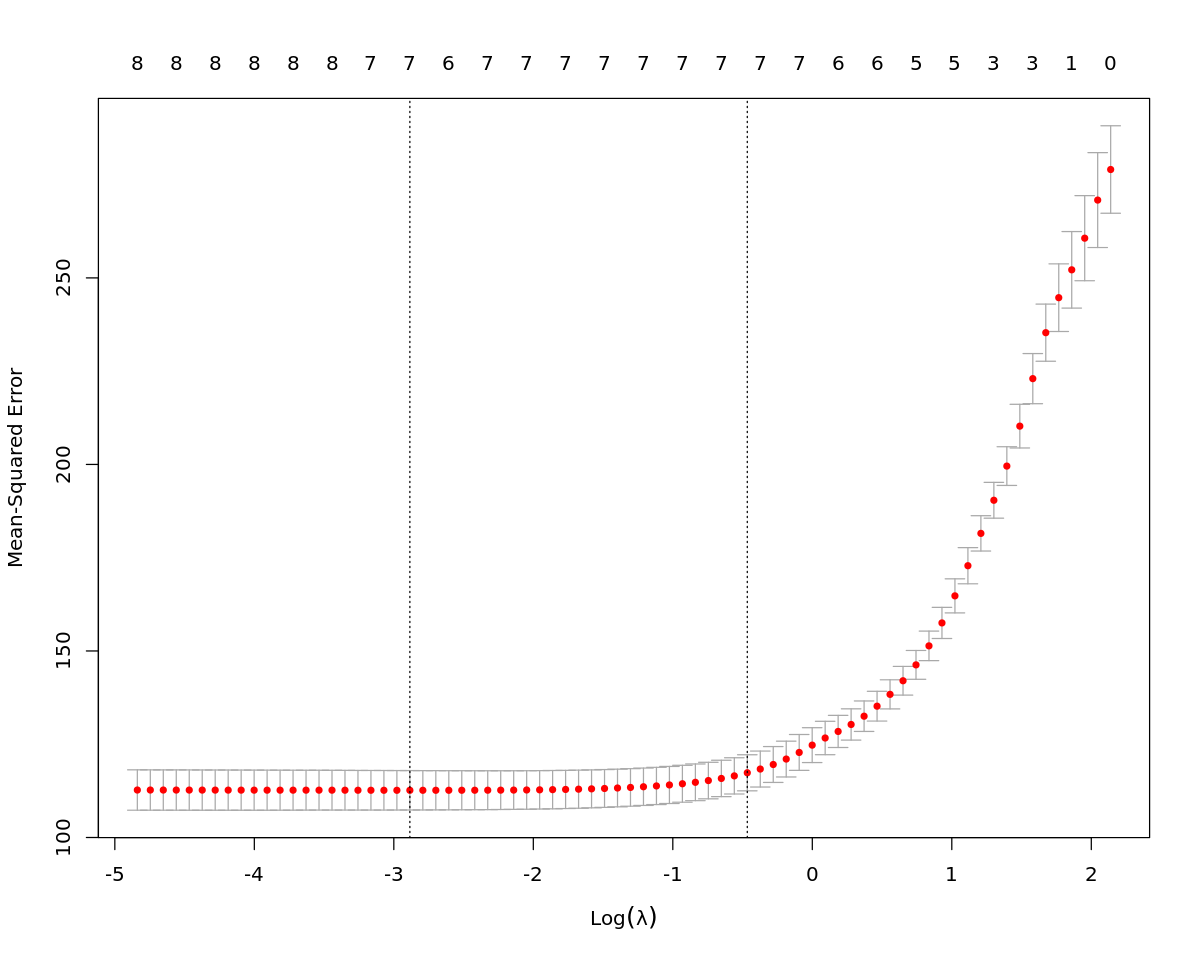

In [293]:
plot(lasso_model_cv,xvar="lambda")

In [294]:
## Prediction on train and validation
y_pred_train_lasso_cv <- predict(lasso_model_cv,as.matrix(train_data_std[,-9]))
y_pred_validation_lasso_cv <- predict(lasso_model_cv,as.matrix(validation_data_std[,-9]))

## Evaluation on train and validation
regr.eval(train_data_std[,9],y_pred_train_lasso_cv)
regr.eval(validation_data_std[,9], y_pred_validation_lasso_cv)


mae         mse        rmse        mape 
  8.5138181 113.1455024  10.6369875   0.3320823

mae         mse        rmse        mape 
  8.3777637 109.8479733  10.4808384   0.3525328

In [295]:
  SSE <- sum((y_pred_train_lasso_cv - train_data_std[,9])^2)
  SST <- sum((train_data_std[,9] - mean(train_data_std[,9]))^2)
  R_square <- 1 - SSE / SST

In [296]:
print(SSE)
print(SST)
print(R_square)

[1] 81577.91
[1] 202445
[1] 0.5970367


<h5> Removing Leverage oulier values : <br>
    - Removed outlier from data using leverage <br>
    - R sqaured improved to 66% <br>
    - Homoscedacity and linear residuals are obtained <br>
    - Training and test error is increased

[1] 0.02912621

[1] 21

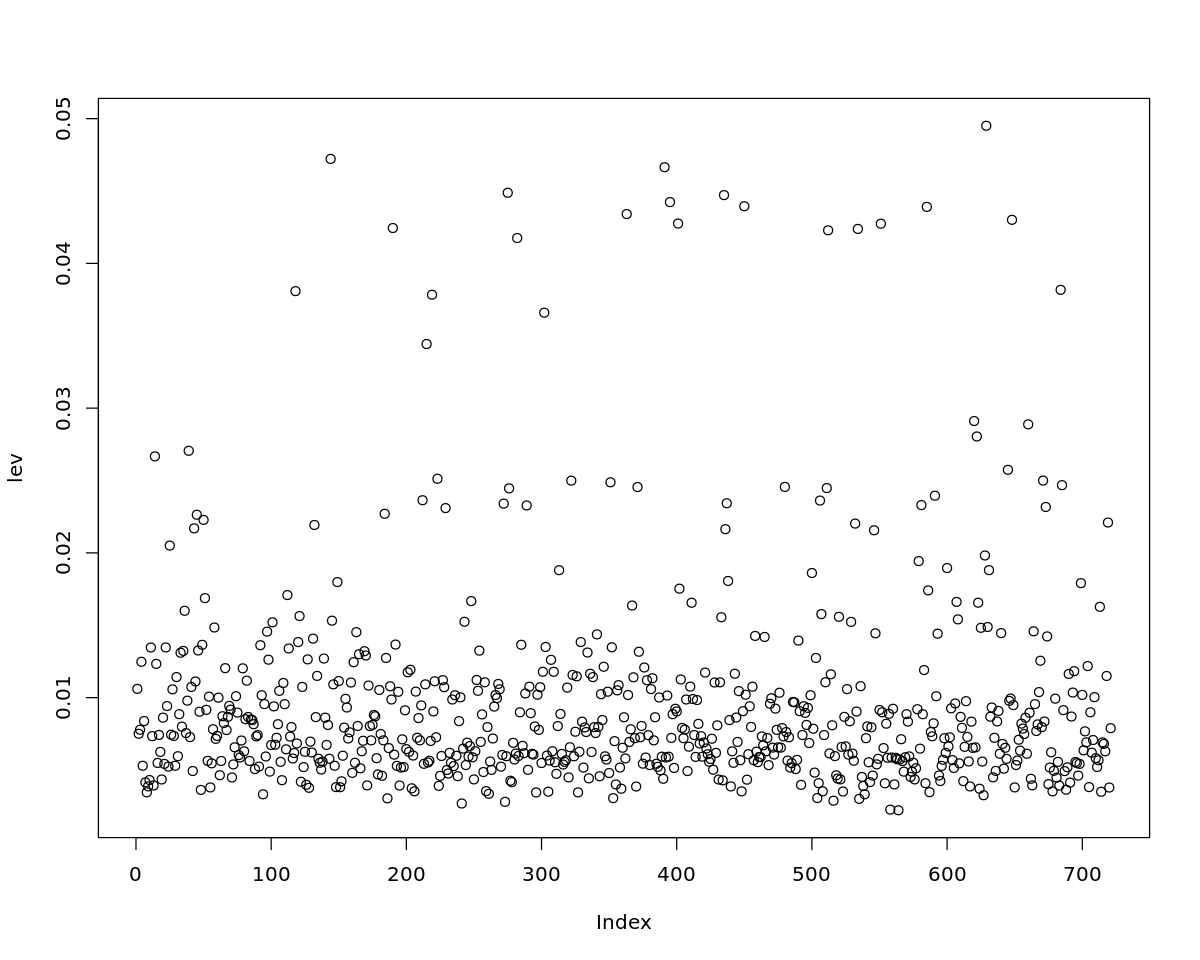

In [300]:
#fundtion to get leverage values

lev= hat(model.matrix(model_aic))
mean(lev)*3
plot(lev)
nrow(train_data_std[lev>0.03,])
train_data_out<-train_data_std[-which(lev>0.03),]

In [301]:
model_aic_out=lm(formula = Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + 
    Fly_Ash + Water + Superplasticizer + Age_in_days, data = train_data_out)

In [302]:
summary(model_aic_out)


Call:
lm(formula = Concrete_compressive_strength ~ Cement + Blast_Furnace_Slag + 
    Fly_Ash + Water + Superplasticizer + Age_in_days, data = train_data_out)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.961  -5.520   0.561   5.919  34.283 

Coefficients:
                   Estimate Std. Error t value             Pr(>|t|)    
(Intercept)         36.8423     0.3705  99.448 < 0.0000000000000002 ***
Cement              11.2940     0.4899  23.053 < 0.0000000000000002 ***
Blast_Furnace_Slag   7.2320     0.4902  14.753 < 0.0000000000000002 ***
Fly_Ash              4.0123     0.5700   7.039     0.00000000000466 ***
Water               -4.7318     0.5209  -9.083 < 0.0000000000000002 ***
Superplasticizer     1.8139     0.6422   2.824              0.00487 ** 
Age_in_days         10.8652     0.5291  20.535 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.704 on 693 degrees of freedom
Multiple R-squared:  0.6674,	A

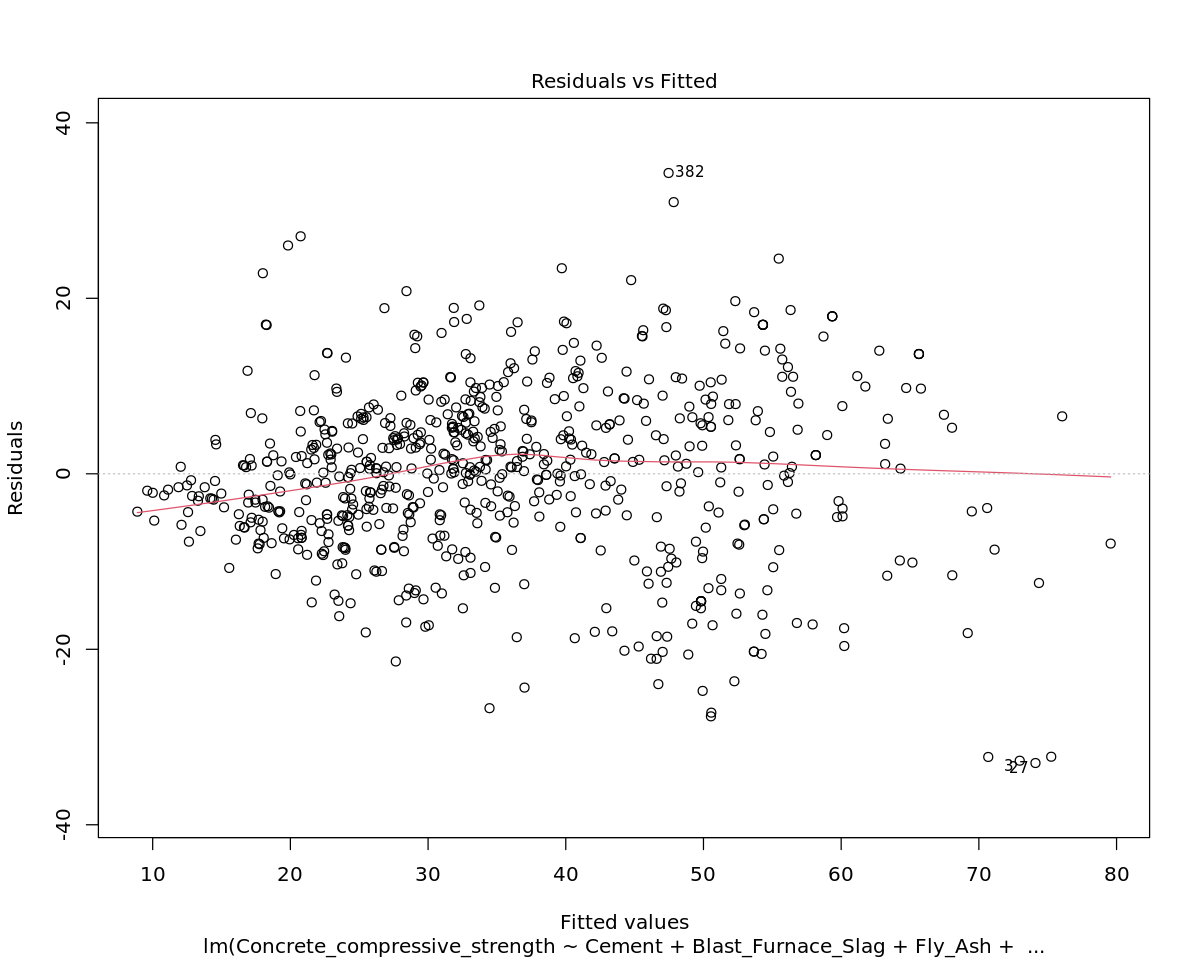

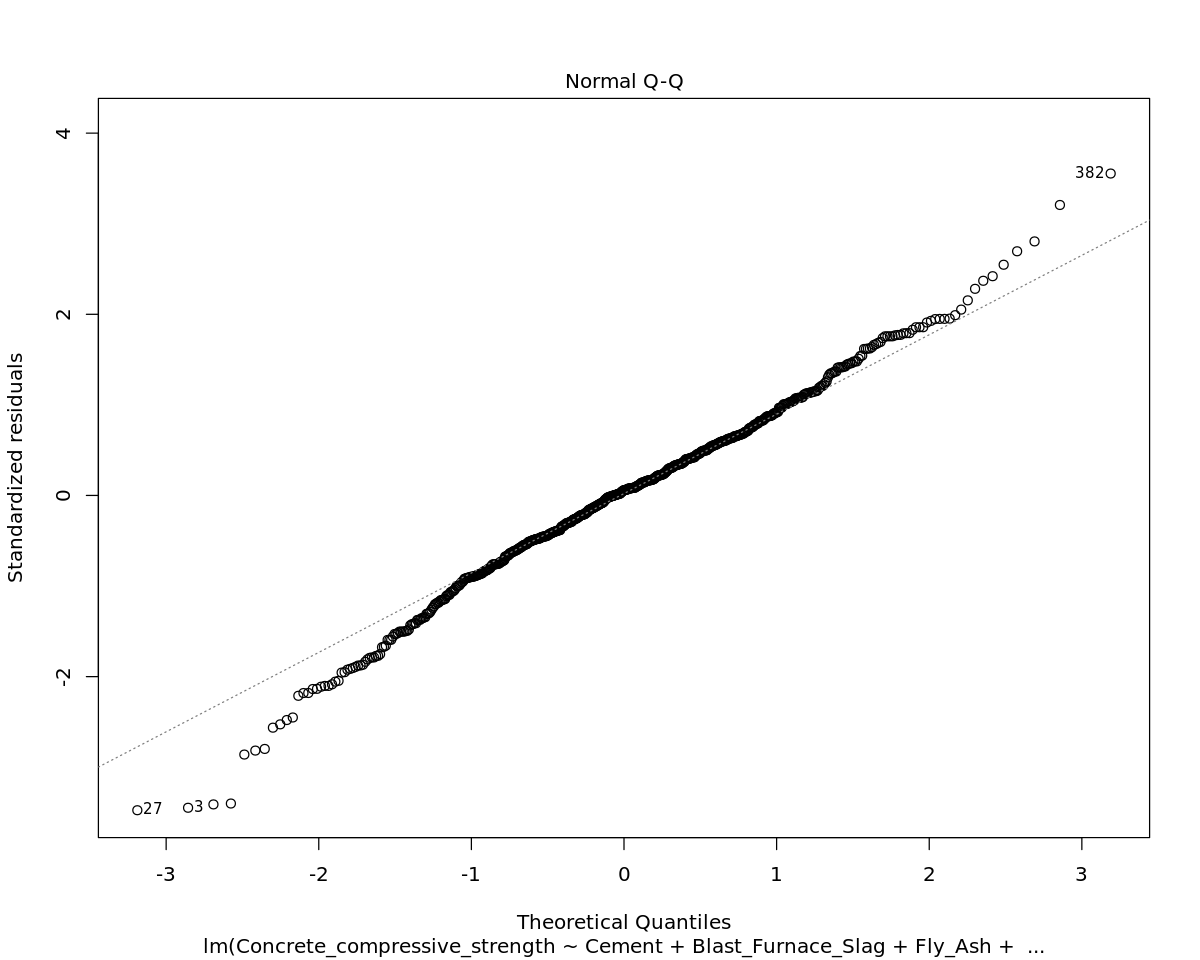

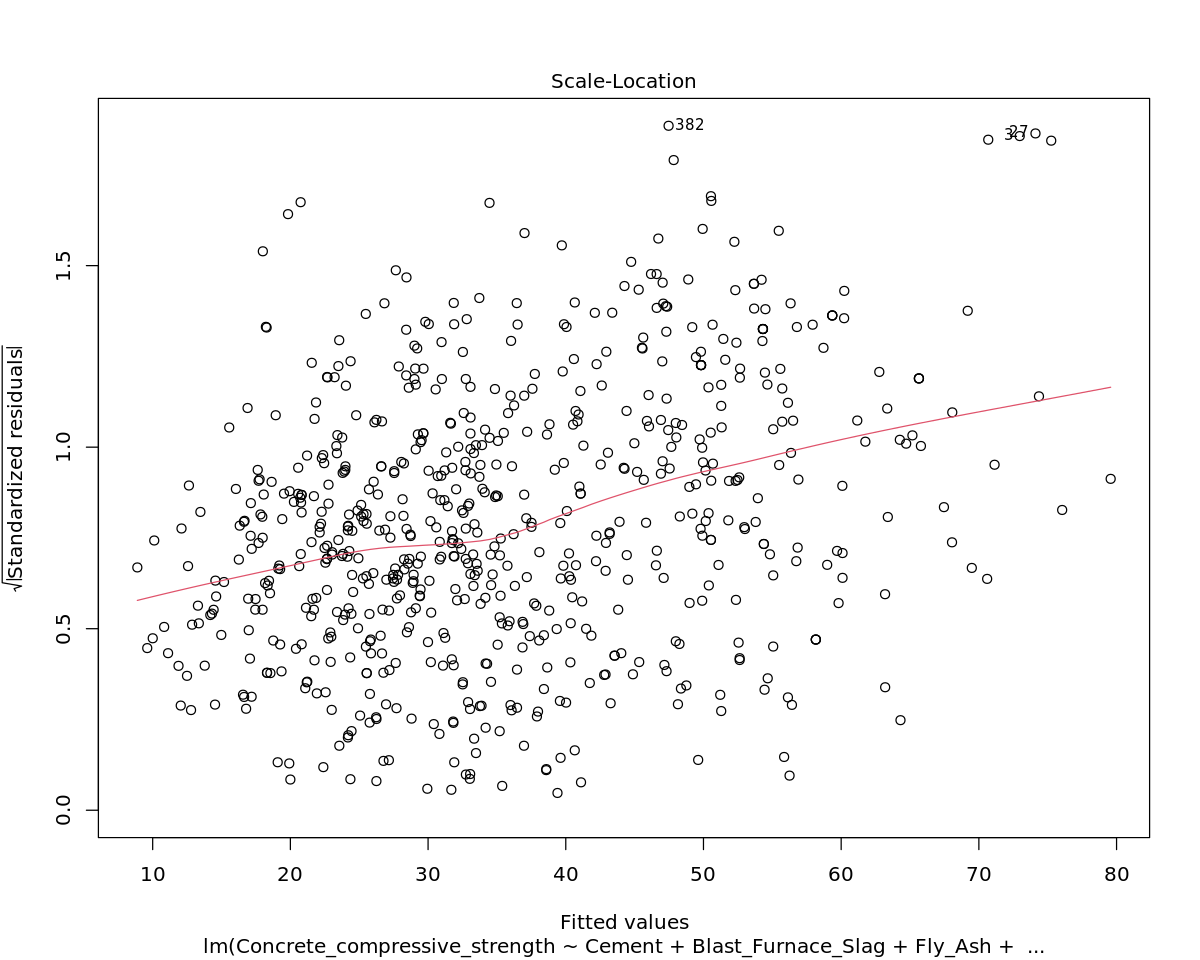

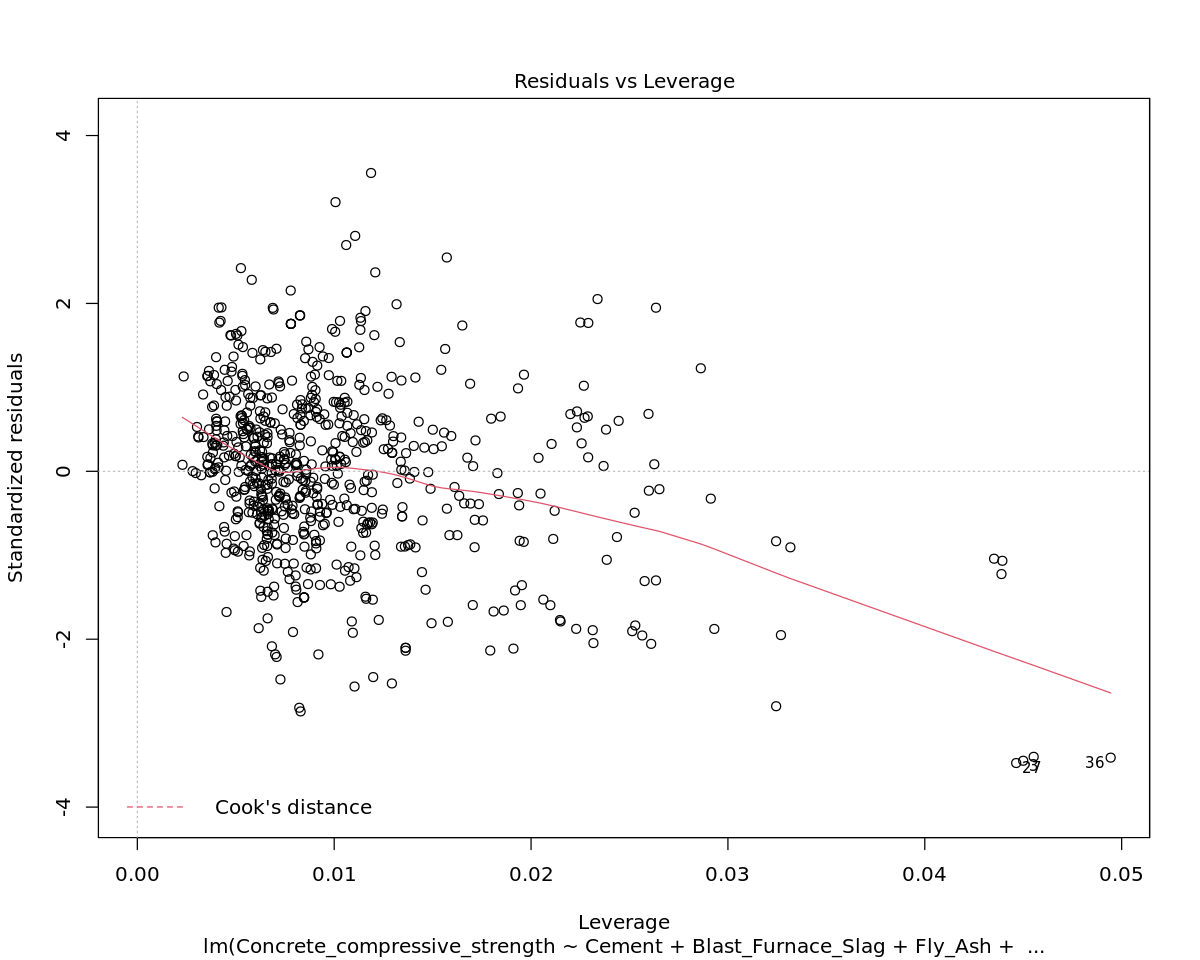

In [303]:
plot(model_aic_out)

In [304]:
## Prediction on train and validation
y_pred_train_out <- predict(model_aic_out,train_data_std[,-9])
y_pred_validation_out <- predict(model_aic_out,validation_data_std[,-9])

## Evaluation on train and validation
regr.eval(train_data_std[,9],y_pred_train_out)
regr.eval(validation_data_std[,9], y_pred_validation_out)


mae         mse        rmse        mape 
  8.0710818 122.7814528  11.0806793   0.2860765

mae         mse        rmse        mape 
  8.3170368 136.1623500  11.6688624   0.3101488

<h5> PCA Model <br>
    - 5 components considered as it covers ariund 85% variablity <br>
    - R sqaured and errors are almost same as AIC model
    

In [305]:
pca = princomp(train_data_std[,-9])

In [306]:
summary(pca)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5
Standard deviation     1.4982388 1.1902219 1.1402243 1.0157879 0.9886093
Proportion of Variance 0.2809796 0.1773245 0.1627396 0.1291573 0.1223382
Cumulative Proportion  0.2809796 0.4583041 0.6210438 0.7502010 0.8725393
                          Comp.6     Comp.7      Comp.8
Standard deviation     0.8979019 0.42489778 0.177498350
Proportion of Variance 0.1009185 0.02259861 0.003943678
Cumulative Proportion  0.9734577 0.99605632 1.000000000

In [310]:
#predidtiion of com values of train and test and coverting it to data frame

train_data_pca_transformed = predict(pca, train_data_std[,-9])

In [311]:
validation_data_pca_transformed = predict(pca,validation_data_std[,-9])

In [312]:
train_data_pca_transformed=data.frame(train_data_pca_transformed,train_data_std[,9])

In [313]:
validation_data_pca_transformed=data.frame(validation_data_pca_transformed,validation_data_std[,9])

In [314]:
colnames(train_data_pca_transformed)[9] = 'CCS'

In [315]:
colnames(validation_data_pca_transformed)[9] = 'CCS'

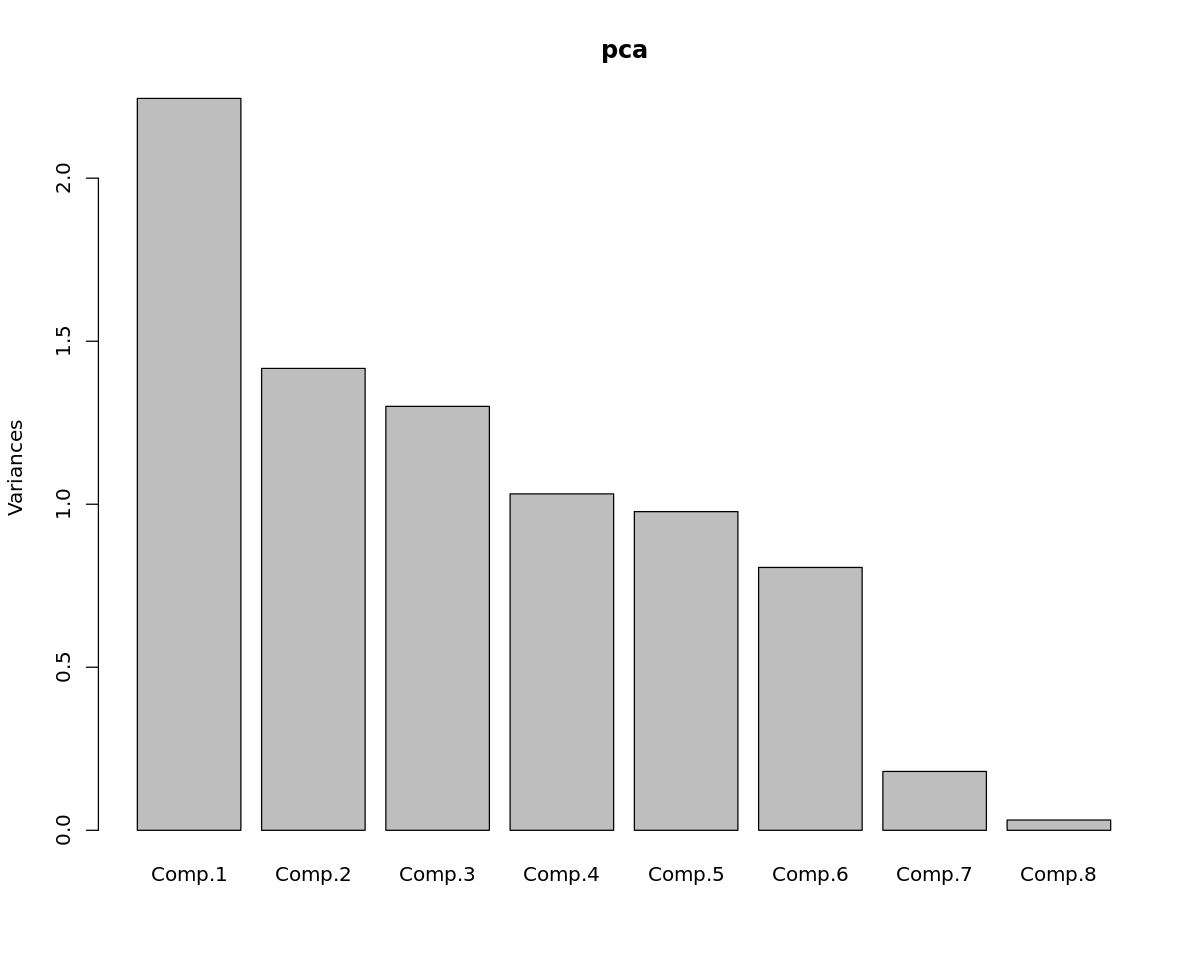

In [316]:
plot(pca)

In [317]:
pca_reg = lm(CCS ~ .,data=train_data_pca_transformed)

In [318]:
summary(pca_reg)


Call:
lm(formula = CCS ~ ., data = train_data_pca_transformed)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.510  -6.339   0.544   6.501  34.574 

Coefficients:
            Estimate Std. Error t value             Pr(>|t|)    
(Intercept) 35.96768    0.38967  92.304 < 0.0000000000000002 ***
Comp.1      -0.27868    0.26008  -1.072                0.284    
Comp.2      -0.09595    0.32739  -0.293                0.770    
Comp.3       8.55342    0.34174  25.029 < 0.0000000000000002 ***
Comp.4      -0.57567    0.38361  -1.501                0.134    
Comp.5       5.85489    0.39416  14.854 < 0.0000000000000002 ***
Comp.6      -5.98429    0.43397 -13.790 < 0.0000000000000002 ***
Comp.7       7.90919    0.91708   8.624 < 0.0000000000000002 ***
Comp.8      10.32379    2.19532   4.703           0.00000308 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.46 on 712 degrees of freedom
Multiple R-squared:  0.615,	Adjusted R-squared:  0.6

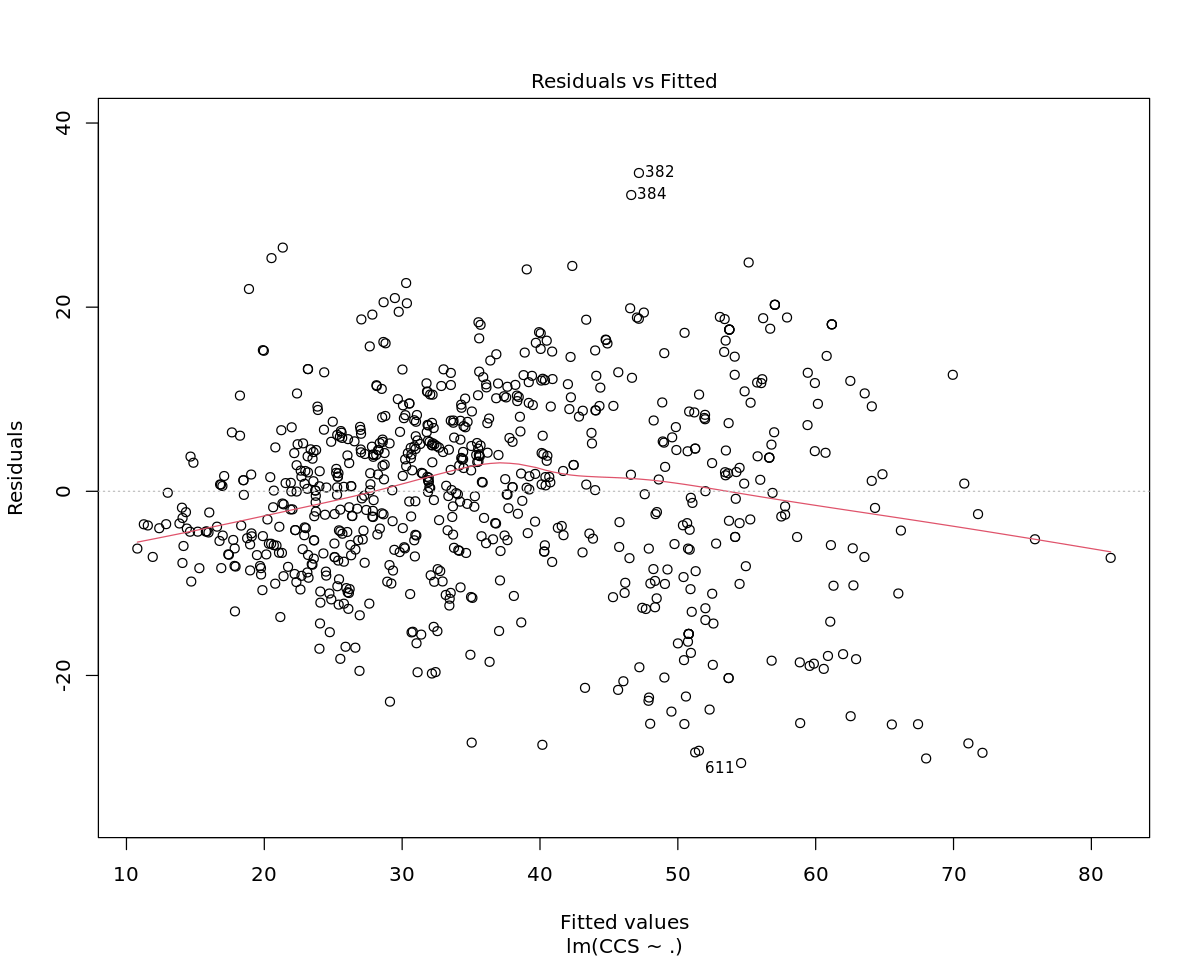

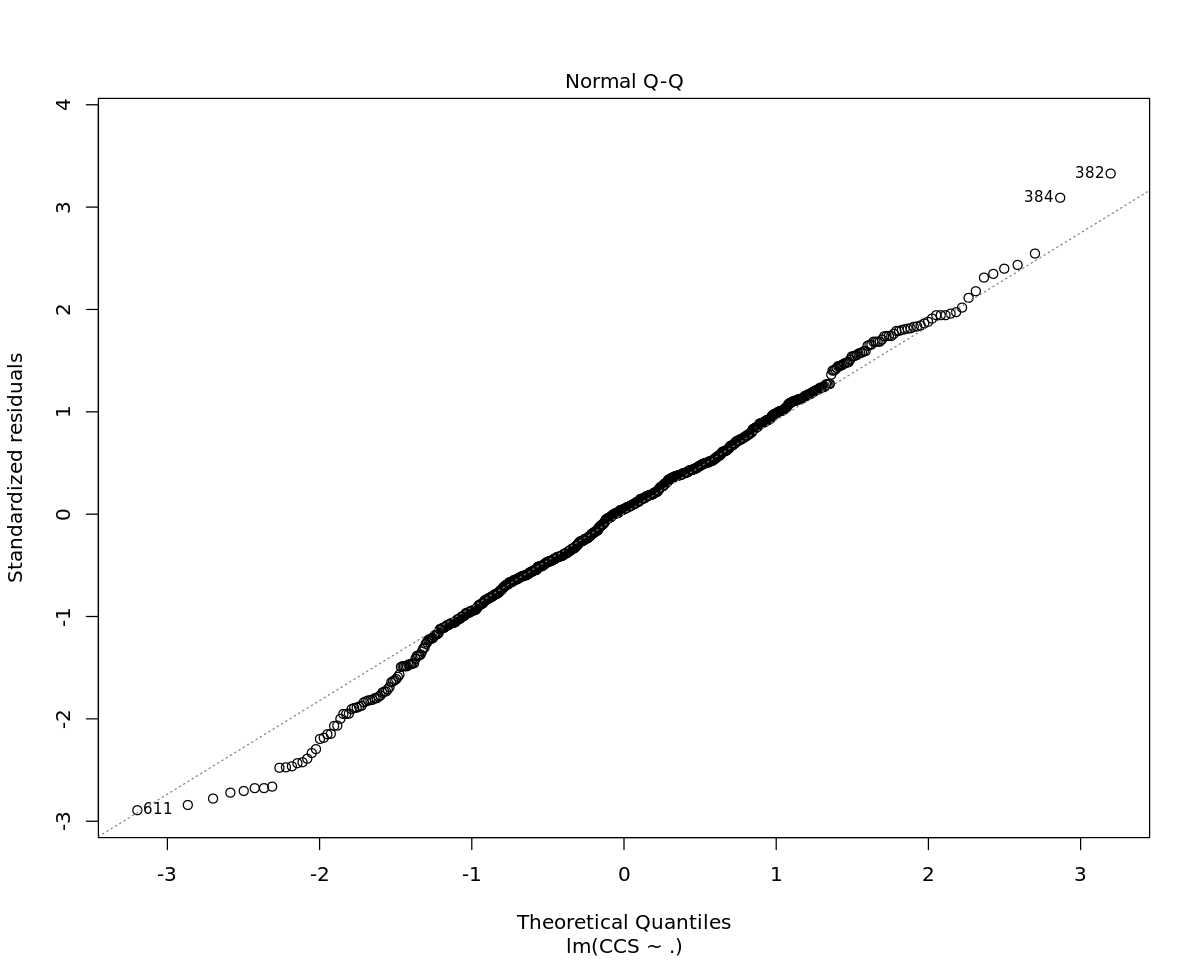

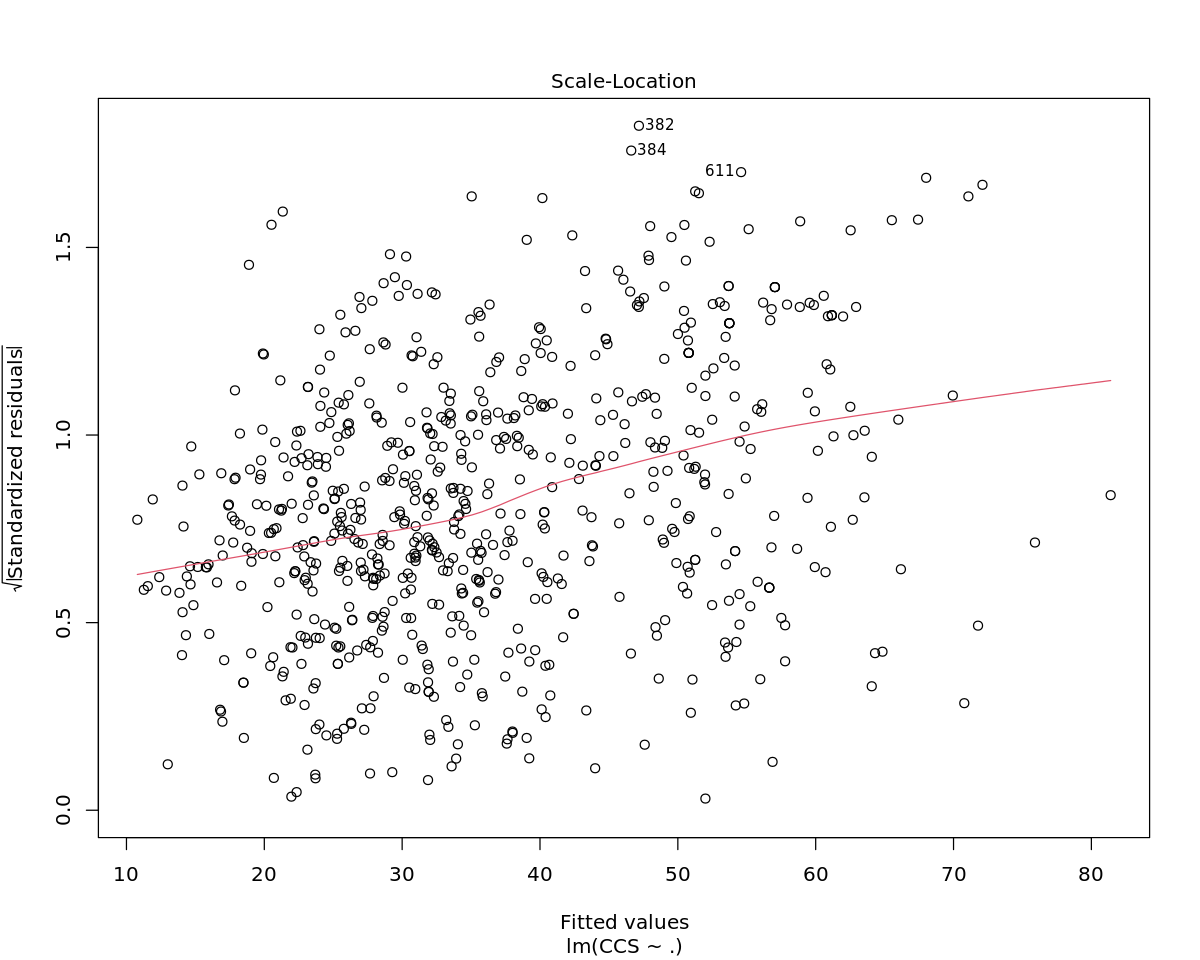

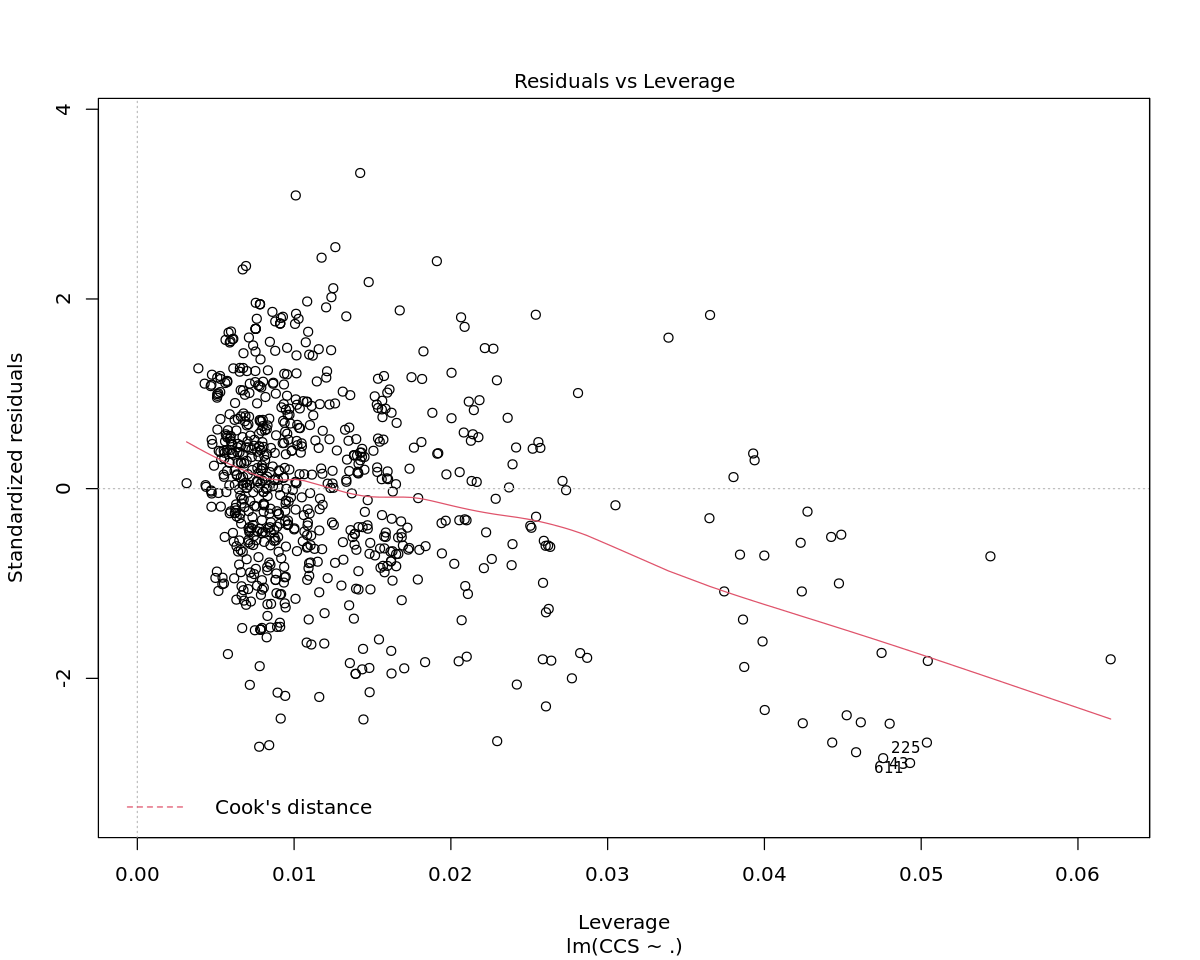

In [319]:
plot(pca_reg)

In [320]:
## Prediction on train and validation
y_pred_train_out <- predict(pca_reg,train_data_pca_transformed[,-9])
y_pred_validation_out <- predict(pca_reg,validation_data_pca_transformed[,-9])

## Evaluation on train and validation
regr.eval(train_data_pca_transformed[,9],y_pred_train_out)
regr.eval(validation_data_pca_transformed[,9], y_pred_validation_out)


mae        mse       rmse       mape 
  8.183580 108.109712  10.397582   0.304133

mae         mse        rmse        mape 
  8.1954366 106.7520468  10.3320882   0.3290679

<h5> Final Model : AIC

In [323]:
#exporting the final test data set with actual and predicted values
test_pred<-cbind(validation_data,y_val_pred_aic)

In [324]:

write.csv(test_pred,"test_pred.csv")